In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

from sklearn.impute import SimpleImputer

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC

## Reading file using pandas 

Pandas reads data and return a dataframe which is data organised in rows and columns.

In [2]:
# Read excel file
df = pd.read_excel('/Users/adriel/Desktop/MLAss/Student_Data.xlsx', sheet_name='Student')

In [3]:
df.head()

,StudentID,Taken,Age,TypeofContact,CGPATier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,BootcampPitched,MaritalStatus,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Digital Marketing,Single,2,1,Manager,20993.0
1,200001,0,49.0,University Called,1,14.0,Salaried,Male,4.0,Digital Marketing,Divorced,3,1,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Python,Single,3,0,Executive,17090.0
3,200003,0,33.0,University Called,1,9.0,Salaried,Female,3.0,Python,Divorced,5,1,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,3.0,Python,Divorced,5,1,Executive,18468.0


In [4]:
df.shape

(4888, 15)

In [5]:
df.nunique() # there seems to be no duplicate

StudentID                 4888
Taken                        2
Age                         44
TypeofContact                2
CGPATier                     3
DurationOfPitch             34
Occupation                   4
Gender                       3
NumberOfFollowups            6
BootcampPitched              5
MaritalStatus                4
PitchSatisfactionScore       5
OwnCar                       2
Designation                  5
MonthlyIncome             2475
dtype: int64

Column details:

Student ID - Unique Id

Taken - Has alumni attended the bootcamp

Age - Age of alumni

TypeofContact - Contacted by University Called or Self Inquiry

CGPATier - ordered CGPA 1 > 2 > 3

DurationOfPitch - Duration of the pitch by a salesperson to the alumni

Occupation - Occupation of alumni

Gender - Gender of alumni

NumberOfFollowups - Total number of follow-ups has been done by sales person after sales 
pitch

BootcampPitched - Bootcamp pitched by the salesperson

MaritalStatus - Marital status of alumni

PitchSatisfactionScore - Sales pitch satisfaction score

OwnCar - Whether the alumni own a car or not (0: No, 1: Yes)

Designation - Designation of the alumni in the current organization

MonthlyIncome - Gross monthly income of the alumni

# Data Preprocessing

## Dealing with missing data
Missing data could be blank space or surrogate values such as NA.

Dealing with it can be done in 2 ways:
- Removing the rows, but this process is a waste of precious information as if only one column is missing we will be deleting all other important features. So we will do the second way which is
- Imputing the missing values (making an educated guess) by filling it with mean (interval variables), median (skewed variables) and mode (categorical variables)

Now we see want kind of data we have.

In [6]:
df.dtypes

StudentID                   int64
Taken                       int64
Age                       float64
TypeofContact              object
CGPATier                    int64
DurationOfPitch           float64
Occupation                 object
Gender                     object
NumberOfFollowups         float64
BootcampPitched            object
MaritalStatus              object
PitchSatisfactionScore      int64
OwnCar                      int64
Designation                object
MonthlyIncome             float64
dtype: object

Observations:
 - We notice that Student ID is not important we can drop it. (to be handled)
 - Taken is our target variable so we can leave it as it is (binary) int.
 - OwnCar is also of type categorical binary.
 - Age can safely be float because most algorithms can handle it.
 - CGPA Tier, Pitch Satisfaction score are ordinal, but it is ok to be of type int.
 - Text based features are classified as objects.
 - All the features type seems appropriate.
Now looking the unique values of each features:

In [7]:
cols = ['Taken','Age','TypeofContact','CGPATier','DurationOfPitch','Occupation'
       , 'Gender','NumberOfFollowups','BootcampPitched','MaritalStatus','PitchSatisfactionScore',
       'OwnCar','Designation','MonthlyIncome']
for col in cols:
    unique = df[col].unique()
    print(f"Unique values in column '{col}':")
    for value in unique:
        print(value)
    print() 

Unique values in column 'Taken':
1
0

Unique values in column 'Age':
41.0
49.0
37.0
33.0
nan
32.0
59.0
30.0
38.0
36.0
35.0
31.0
34.0
28.0
29.0
22.0
53.0
21.0
42.0
44.0
46.0
39.0
24.0
43.0
50.0
27.0
26.0
48.0
55.0
45.0
56.0
23.0
51.0
40.0
54.0
58.0
20.0
25.0
19.0
57.0
52.0
47.0
18.0
60.0
61.0

Unique values in column 'TypeofContact':
Self Enquiry
University Called
nan

Unique values in column 'CGPATier':
3
1
2

Unique values in column 'DurationOfPitch':
6.0
14.0
8.0
9.0
30.0
29.0
33.0
22.0
21.0
32.0
25.0
27.0
11.0
17.0
15.0
13.0
12.0
16.0
10.0
31.0
18.0
nan
24.0
35.0
28.0
20.0
26.0
34.0
23.0
5.0
19.0
126.0
7.0
36.0
127.0

Unique values in column 'Occupation':
Salaried
Free Lancer
Small Business
Large Business

Unique values in column 'Gender':
Female
Male
Fe Male

Unique values in column 'NumberOfFollowups':
3.0
4.0
2.0
5.0
nan
1.0
6.0

Unique values in column 'BootcampPitched':
Digital Marketing
Python
Microsoft Excel
R Programming
Social Media Psychology

Unique values in column 'Mari

In [8]:
df.isna().sum()

StudentID                   0
Taken                       0
Age                       226
TypeofContact              25
CGPATier                    0
DurationOfPitch           251
Occupation                  0
Gender                      0
NumberOfFollowups          45
BootcampPitched             0
MaritalStatus               0
PitchSatisfactionScore      0
OwnCar                      0
Designation                 0
MonthlyIncome             233
dtype: int64

### Notable observations:
- Age has nan values, so does TypeofContact,DurationOfPitch, NumberOfFollowups, MonthlyIncome
- Occupation has 4 values: Salaried, Free Lancer, Small Business, Large Business
- Gender has invalid result which is Fe Male
- MaritalStatus has 4 values: Single, Divorced, Married, Unmarried. Single and Unmarried should be the same.
- PitchSatisfactionScore is ranging from 1 - 5
- Designation has 5 values: Manager, Executive, Senior Manager, AVP, and VP
- MonthlyIncome seems to range from 10k to 30k

We want to see how many rows contains the nan values

In [9]:
len(df.loc[ (pd.isna(df['Age']))
           |
            (pd.isna(df['TypeofContact']))
           |
            (pd.isna(df['DurationOfPitch']))
           |
            (pd.isna(df['NumberOfFollowups']))
           |
            (pd.isna(df['MonthlyIncome']))])

528

In [10]:
len(df)

4888

In [11]:
(528 / 4888) * 100

10.801963993453354

There is 528 rows with missing values. This is a quite a lot of rows (10.8%) of the data frame to remove so we will impute. Before that we remove any duplicated rows if any,drop unnecessary variables, perform correlation visualisation and graph visualisations.

In [12]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [StudentID, Taken, Age, TypeofContact, CGPATier, DurationOfPitch, Occupation, Gender, NumberOfFollowups, BootcampPitched, MaritalStatus, PitchSatisfactionScore, OwnCar, Designation, MonthlyIncome]
Index: []


There seems to be no duplicates rows

In [13]:
# Create new df without ID
df1 = df.drop('StudentID', axis = 1)

### Replacing Fe Male to Female in the new df

Replacement is done by converting the observations in Gender first to string. Then replacing any characters after 'fe' by using the regex option which matches any words that starts with 'fe' and replacing it with the string Female. case = False allows us to not care about the case sensitivity. Female is then converted back into object. 

In [14]:
# Replacing Fe Male with Female
df1['Gender'] = df1['Gender'].astype(str)

# Use regex to replace variations of 'female'
df1['Gender'] = df1['Gender'].str.replace(r'fe\s*male', 'Female', case=False, regex=True)
df1['Gender'] = df1['Gender'].astype('object')

In [15]:
df1['Gender'].unique()

array(['Female', 'Male'], dtype=object)

### Explaratory Data Analysis

In [16]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Taken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
CGPATier,4888.0,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0
OwnCar,4888.0,0.620295,0.485363,0.0,0.0,1.0,1.0,1.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.0,22347.0,25571.0,98678.0


In [17]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):

    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False) bins: number of bins for histogram (default None)
    """

    f2, (ax_box2 , ax_hist2) = plt.subplots(
        nrows=2, # Number of rows of the subplot grid= 2 
        sharex=True, # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize ,
    ) # creating the 2 subplots 
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    ) # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    ) # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    ) # Add mean to the histogram 
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-" 
    ) # Add median to the histogram

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


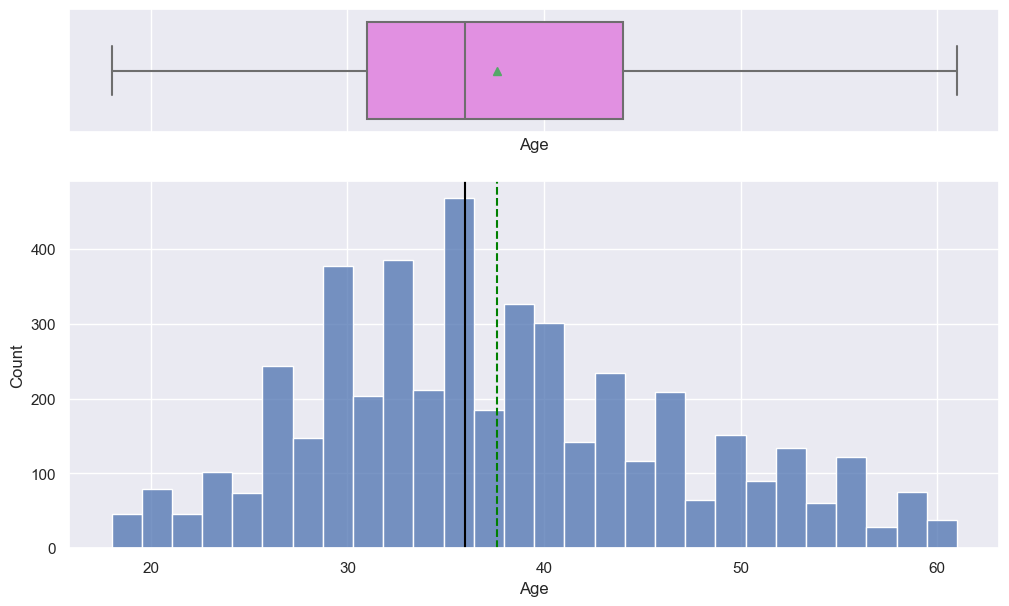

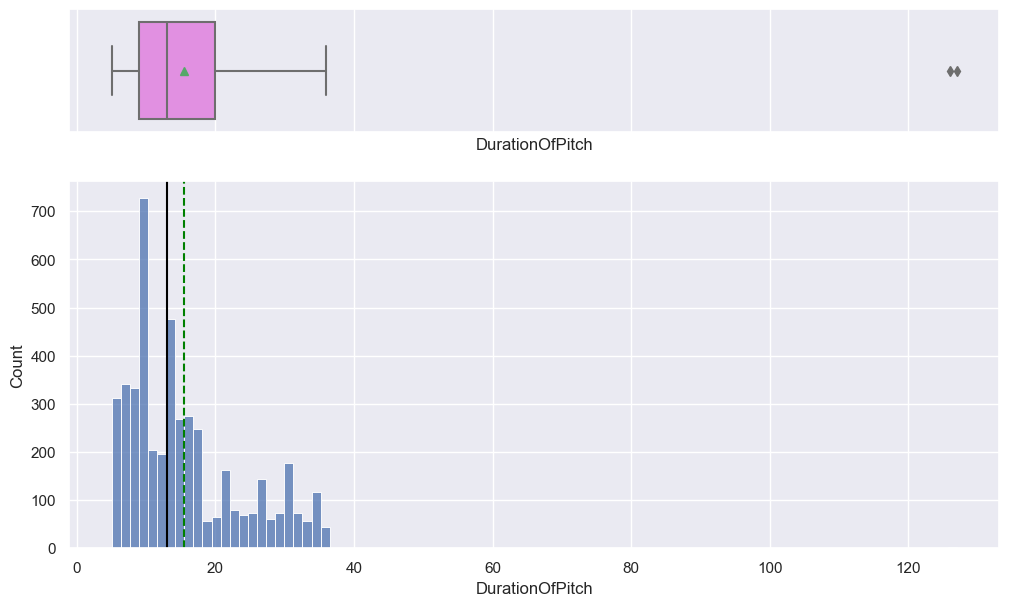

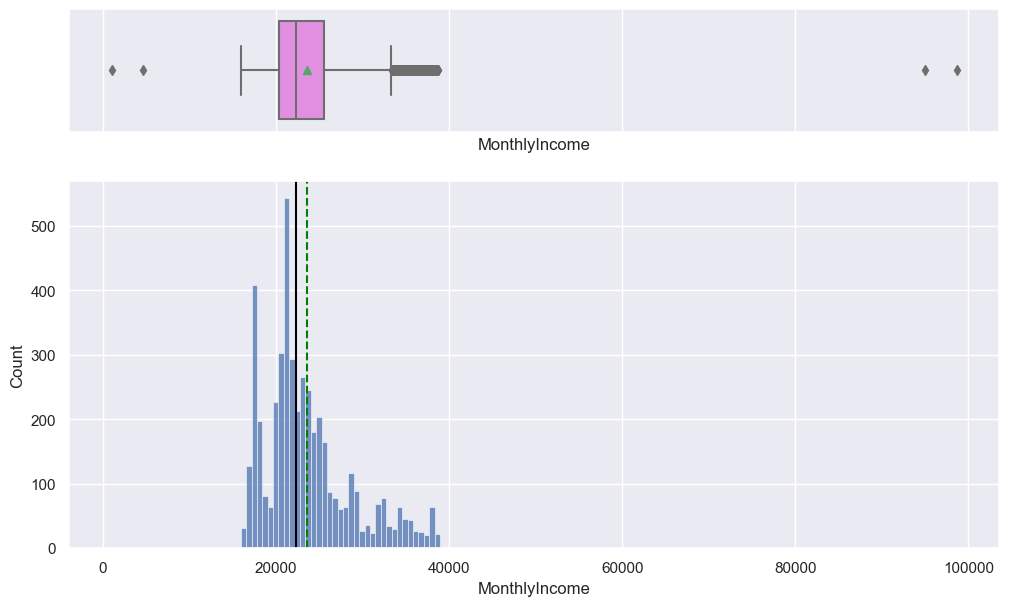

In [18]:
histogram_boxplot(df1, 'Age')
histogram_boxplot(df1, 'DurationOfPitch')
histogram_boxplot(df1, 'MonthlyIncome')

It looks like there are outliers for Duration of Pitch, a pitch that last 120 minutes above might be a data entry error, as most pitches ranges from 0 to roughly less than 40 minutes, so we will remove it as it will skew the results. 
It looks like there are also outliers for monthly income but it seems like it is not a data entry error given that there are indication of free lancers and self-employed individuals that essentially make varying amounts of money so we will just leave it there.

## Removing outliers using the Interquartile method

In [19]:
Q1 = df1.DurationOfPitch.quantile(0.25)
Q3 = df1.DurationOfPitch.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
upper

36.5

In [20]:
# Use a new df to store the modified feature
df2 = df1[ (df1.DurationOfPitch > 0) & (df1.DurationOfPitch < upper) | df1['DurationOfPitch'].isnull()]

In [21]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Taken,4886.0,0.188293,0.390986,0.0,0.0,0.0,0.0,1.0
Age,4661.0,37.618966,9.314662,18.0,31.0,36.0,44.0,61.0
CGPATier,4886.0,1.653704,0.916366,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4635.0,15.442934,8.203335,5.0,9.0,13.0,20.0,36.0
NumberOfFollowups,4841.0,3.708531,1.002655,1.0,3.0,4.0,4.0,6.0
PitchSatisfactionScore,4886.0,3.079001,1.365424,1.0,2.0,3.0,4.0,5.0
OwnCar,4886.0,0.620139,0.485402,0.0,0.0,1.0,1.0,1.0
MonthlyIncome,4653.0,23621.271438,5381.284916,1000.0,20346.0,22351.0,25571.0,98678.0


In [22]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels) 
    """
    total = len(data[feature]) # length of the column 
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5)) 
    else:
        plt.figure(figsize=(n + 1, 5))
    
    plt.xticks(rotation=90, fontsize=15) 
    ax = sns.countplot(
        data=data,
        x=feature ,
        palette="Paired", 
        order=data[feature].value_counts().index[:n].sort_values(),
    )
    
    for p in ax.patches: 
        if perc == True:
            label = "{:.1f}%".format(
            100 * p.get_height() / total
            ) # percentage of each class of the category 
        else:
            label = p.get_height() # count of each level of the category 
        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height() # height of the plot 
    
    ax.annotate(
        label ,
        (x, y),
        ha="center", 
        va="center", 
        size=12, 
        xytext=(0, 5),
        textcoords="offset points", 
    ) # annotate the percentage
    plt.show() # show the plot

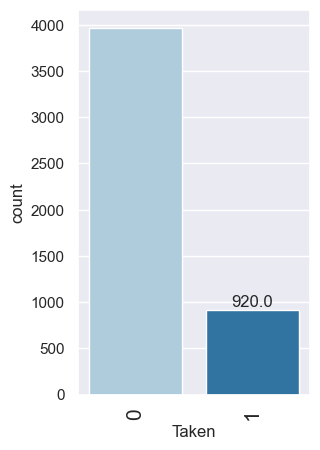

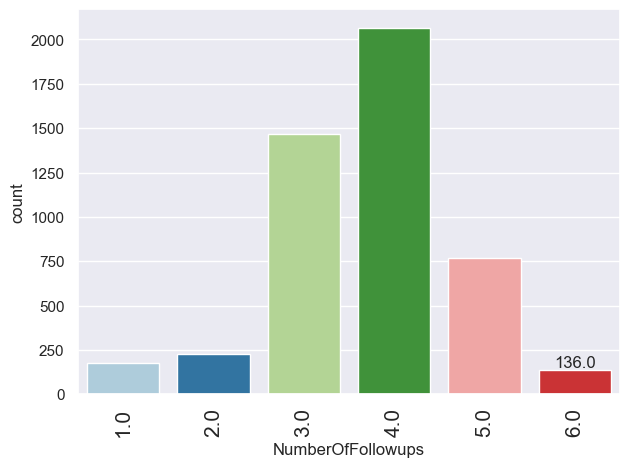

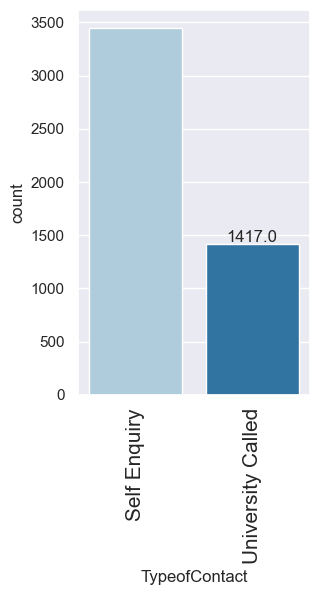

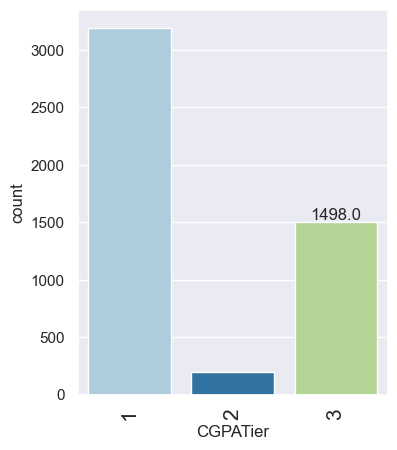

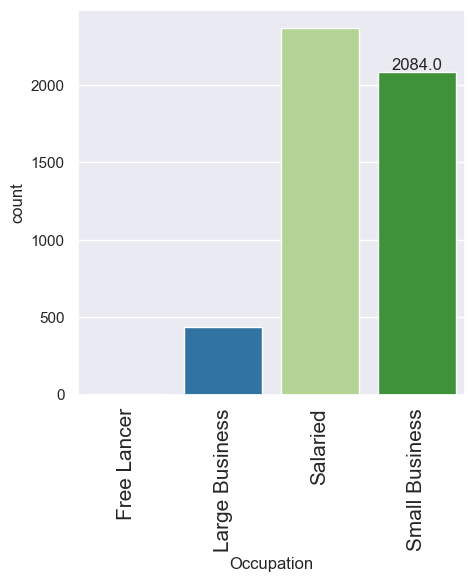

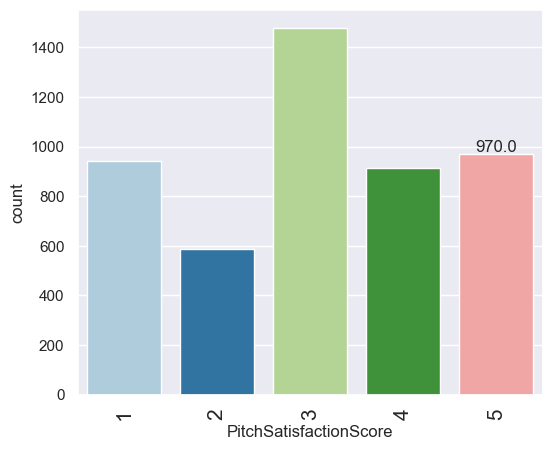

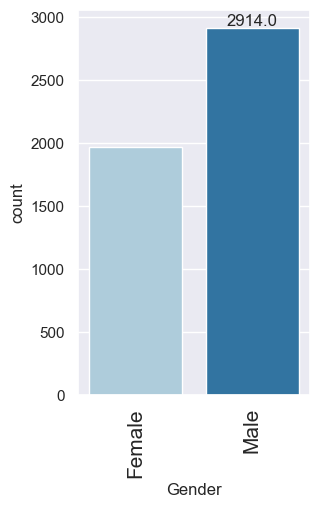

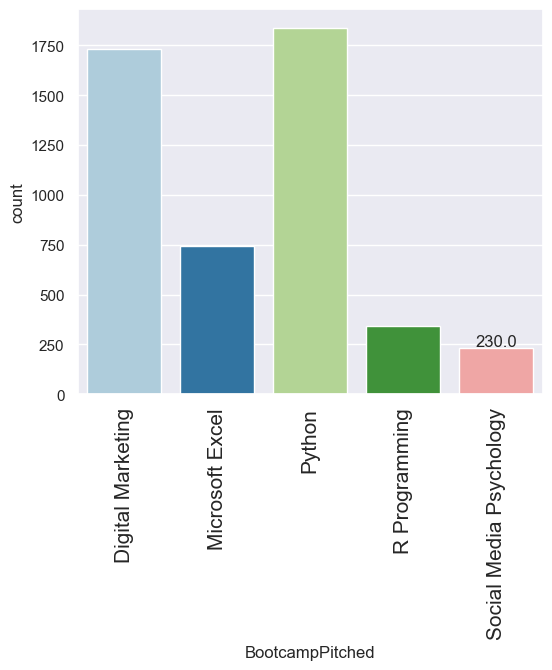

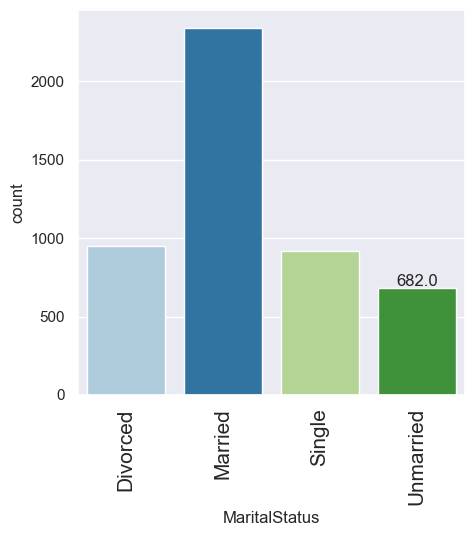

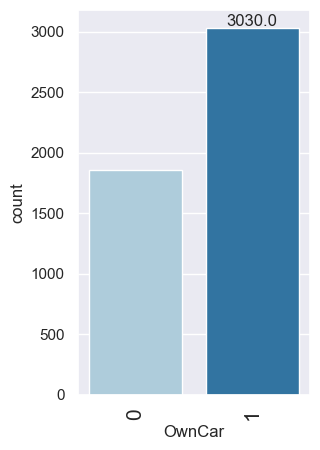

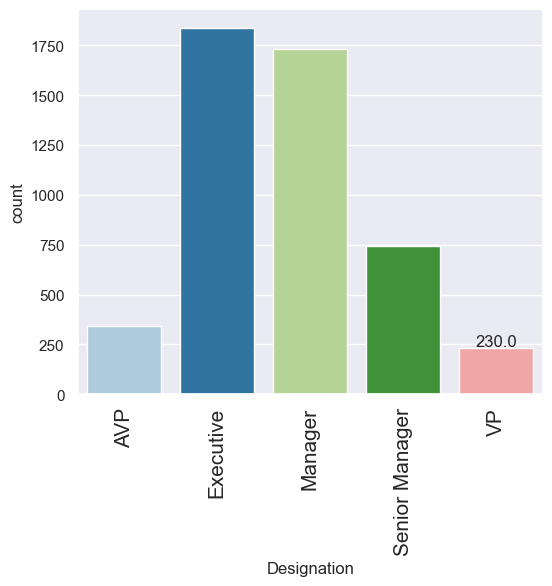

In [23]:
labeled_barplot(df2, 'Taken')
labeled_barplot(df2, 'NumberOfFollowups')
labeled_barplot(df2, 'TypeofContact')
labeled_barplot(df2, 'CGPATier')
labeled_barplot(df2, 'Occupation')
labeled_barplot(df2, 'PitchSatisfactionScore')
labeled_barplot(df2, 'Gender')
labeled_barplot(df2, 'BootcampPitched')
labeled_barplot(df2, 'MaritalStatus')
labeled_barplot(df2, 'OwnCar')
labeled_barplot(df2, 'Designation')

## Notable observations
- For Taken, it looks like there are more individuals not responding to the invitation.
- For Number of Followups, it looks like 4 followups is the most common. Since this variable has missing values we will impute it with the mode which is 4 follow ups.
- For Type of Contact, Self Enquiry looks like the most common way of contact.
- For CGPA Tier, Tier 1 seems to be the most common one.
- For Occupation an interesting thing to note is that there seems to be very litte amount of free lancers, with Salaried individuals being the most common followed by Small Business.
- For Pitch Satisfaction Score,a score of 3 seems to be the most common one.
- For Gender, there are more males as compared to females.
- For Bootcamp Pitched, Python and Digital Marketing seems to be the most common subjects pitched.
- For Marital Status, there are more married individuals. Here we notice that Single and Unmarried basically mean the same thing, to reduce the numbers of features for easier analysis, we will convert 'Unmarried' to 'Single'.
- There seems to be more people owning cars than not owning cars.
- For Designation, it seems like that there is a lot of executives and managers.

### Replacing Unmarried to Single

In [24]:
# Replacing Unmarried with Single
df2.loc[df2['MaritalStatus'] == 'Unmarried', 'MaritalStatus'] = 'Single'

# Verifying
df2['MaritalStatus'].value_counts()

MaritalStatus
Married     2338
Single      1598
Divorced     950
Name: count, dtype: int64

In [25]:
# Verifying whether free lancer exists
df2['Occupation'].value_counts() 
# there are only 2 free lancers
# we will remove them because it can cause error in splitting the data due to its low amount

Occupation
Salaried          2366
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

In [26]:
# Make sure our df has no free lancer in occupation
df2 = df2[df2['Occupation'] != 'Free Lancer']

In [27]:
# Check
df2[df2['Designation'] == 'Free Lancer']

,Taken,Age,TypeofContact,CGPATier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,BootcampPitched,MaritalStatus,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome


In [28]:
# Looking at the MonthlyIncome outlier we noticed that there are 2 points above 90000
df2[df2['MonthlyIncome'] > 40000]
# It does seem like these are outliers since we do not have much context it better to just remove it 
# because it can skew the results. And most Executives do not even produce 40k plus.

,Taken,Age,TypeofContact,CGPATier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,BootcampPitched,MaritalStatus,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome
38,0,36.0,Self Enquiry,1,11.0,Salaried,Female,4.0,Python,Divorced,2,1,Executive,95000.0
2482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,5.0,Python,Divorced,2,1,Executive,98678.0


In [29]:
# Remove both based on row index

# This drops the row at the indexes
df2 = df2.drop(38)
df2 = df2.drop(2482)

In [30]:
# Check
df2[df2['MonthlyIncome'] > 40000]

,Taken,Age,TypeofContact,CGPATier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,BootcampPitched,MaritalStatus,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome


In [31]:
# Define bivariate distribution plot with target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    
    target_uniq = data[target].unique()
    
    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0])) 
    
    sns.histplot(
        data=data[data[target] == target_uniq[0]], 
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal", 
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq [1]))
    
    sns.histplot(
        data=data[data[target] == target_uniq[1]], 
        x=predictor ,
        kde=True,
        ax=axs[0, 1],
        color="orange", 
    )
        
    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
    
    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot( 
        data=data,
        x=target , 
        y=predictor , 
        ax=axs[1, 1], 
        showfliers=False,
        palette="gist_rainbow", 
    )

    plt.tight_layout() 
    plt.show()

## Feature selection using graphical methods

### Feature selection of interval variables

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


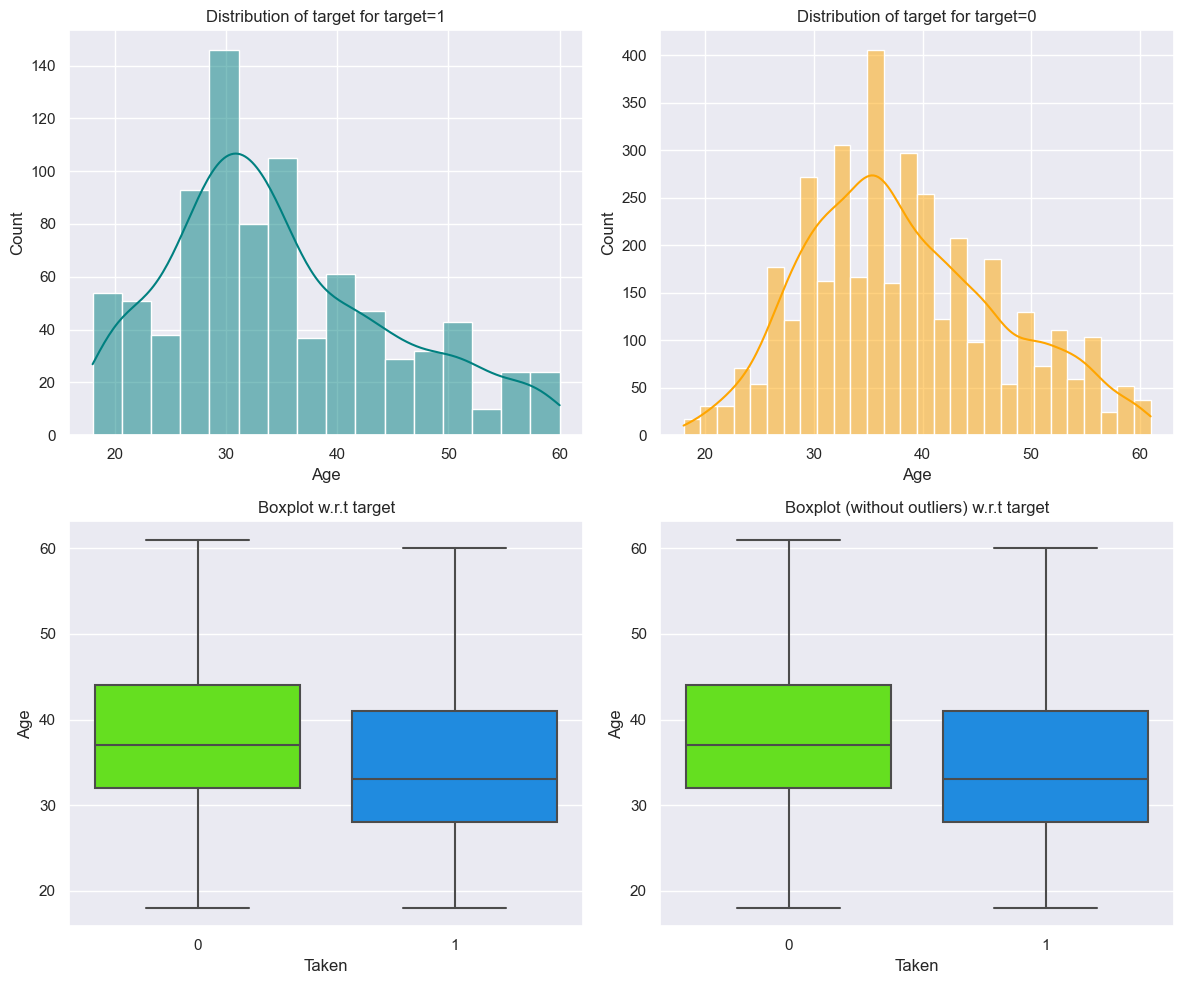

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


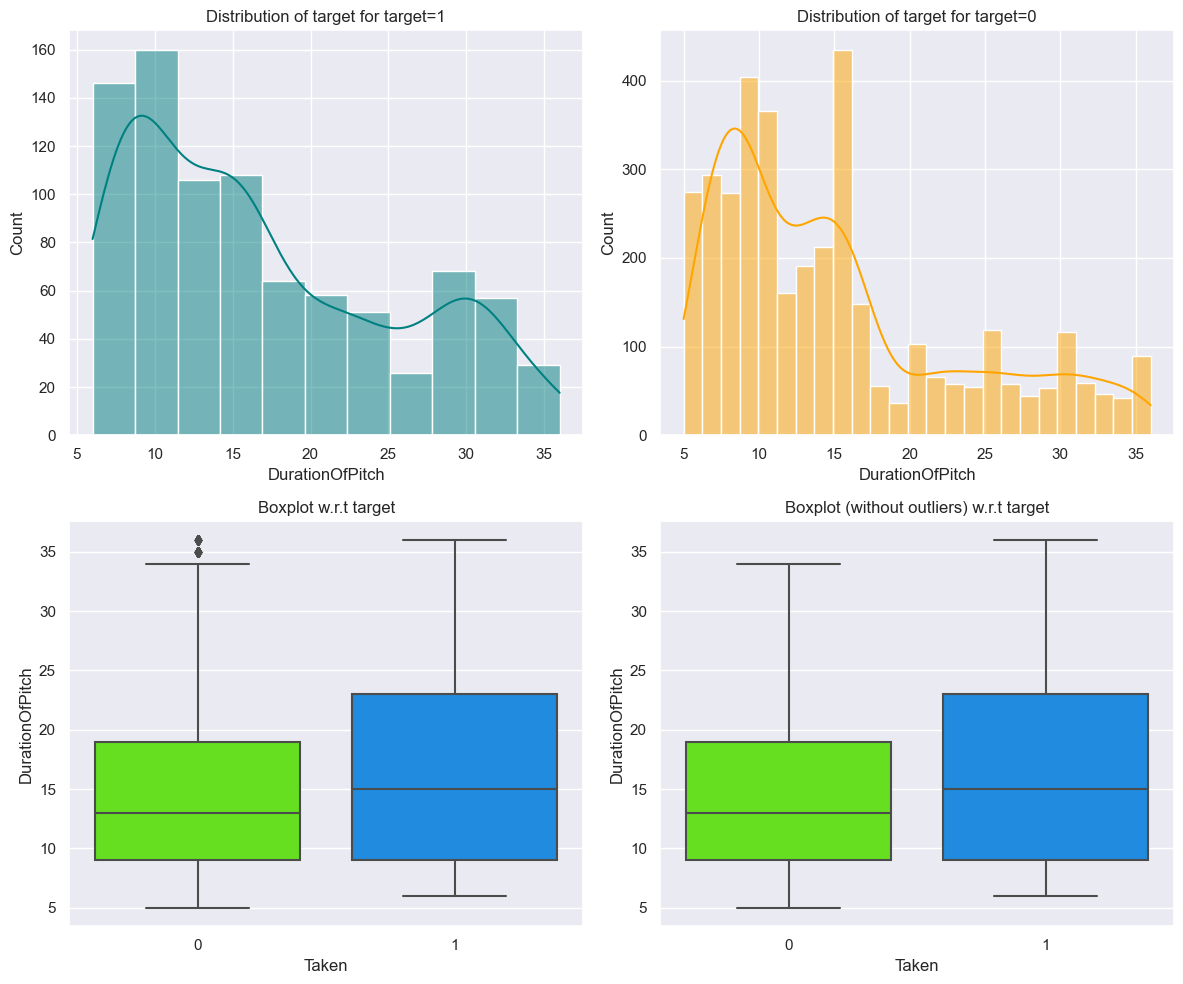

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


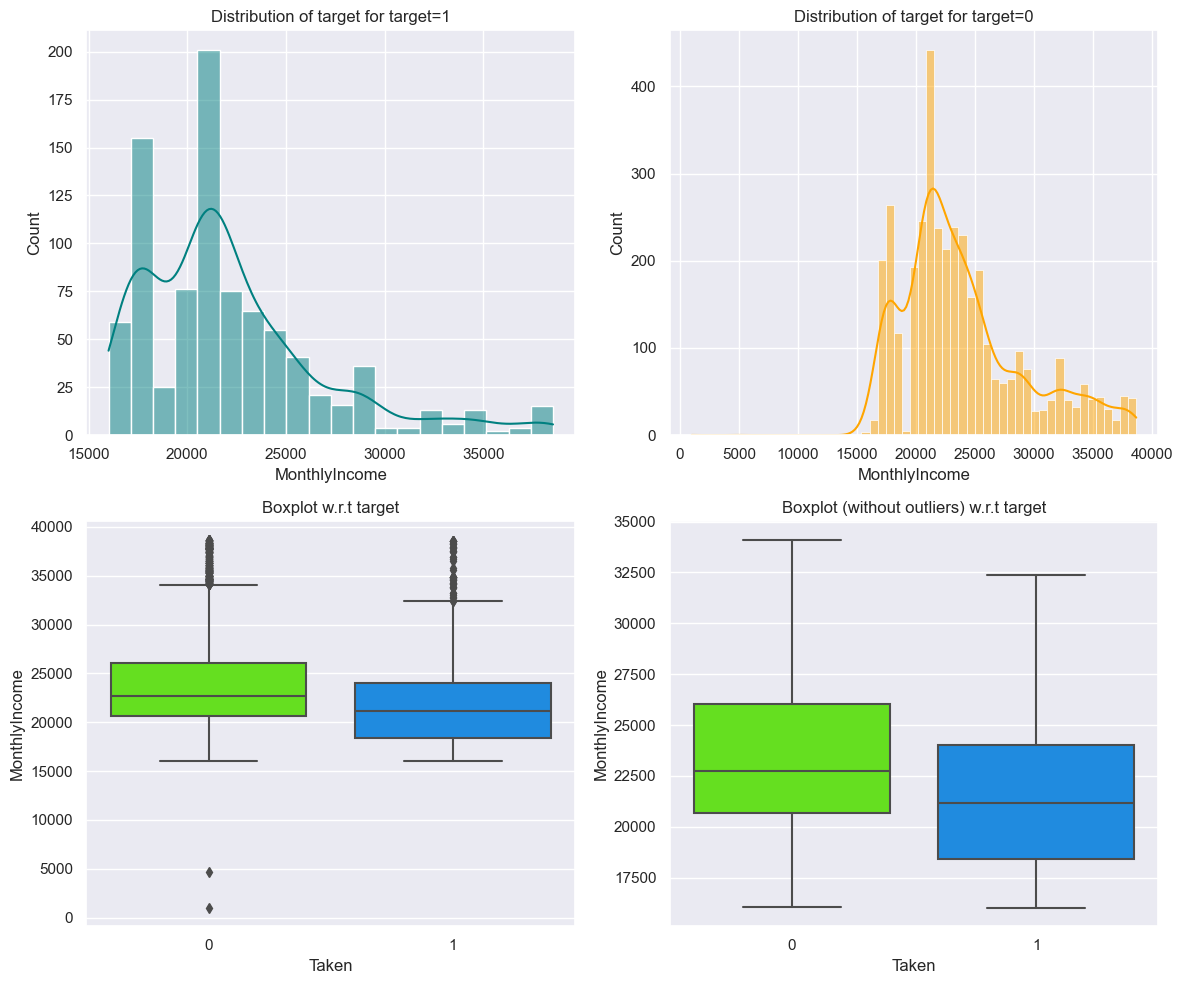

In [32]:
distribution_plot_wrt_target(df2, 'Age', 'Taken')
distribution_plot_wrt_target(df2, 'DurationOfPitch', 'Taken')
distribution_plot_wrt_target(df2, 'MonthlyIncome', 'Taken')

The distribution of Age seem to differ slightly between individuals that did not take the bootcamp and those that has; given a random individuals it looks like younger individuals are more likely to take the bootcamp. We will take account of this feature in the analysis, accounting for correlation also in the next section.

The distribution of Duration Pitch also seem to differ slightly between individuals that did not take the bootcamp and those that has. Those that have taken the bootcamp seem to have a longer distribution meaning that are more likely to receive a longer pitch. By observation it looks like pitch that lasted longer than 18 minutes might have caused this. We will take account of this in the analysis, accounting for correlation also in the next section.

The distribution of Monthly Income also seem to differ slightly between individuals that did not take the bootcamp and those that has; by observation those that has monthly income of approximately 20k and lower are more likely to take the bootcamp. We will take account of this in the analysis, accounting for correlation also in the next section.

### Feature selection of categorical variables using graphical methods

In [33]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart
    data: dataframe
    predictor: independent variable target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter , ascending=False 
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter , 
        ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5)) 
    plt.legend(
    loc="lower left",
    frameon=False , 
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Taken                 0    1   All
NumberOfFollowups                 
All                3927  910  4837
4.0                1687  378  2065
3.0                1221  244  1465
5.0                 576  190   766
6.0                  82   54   136
2.0                 205   24   229
1.0                 156   20   176
------------------------------------------------------------------------------------------------------------------------


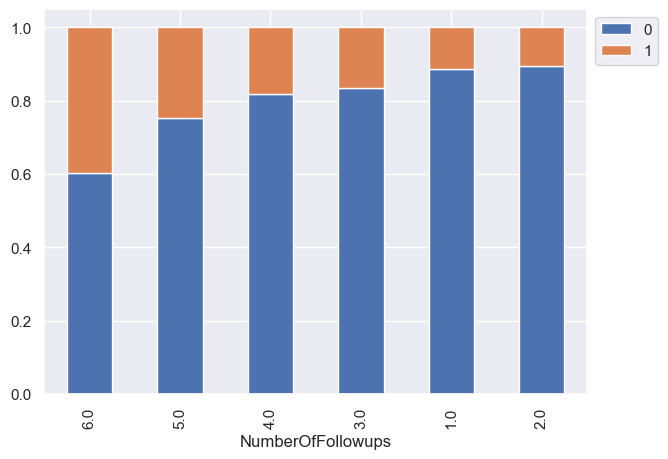

Taken                 0    1   All
TypeofContact                     
All                3942  915  4857
Self Enquiry       2835  605  3440
University Called  1107  310  1417
------------------------------------------------------------------------------------------------------------------------


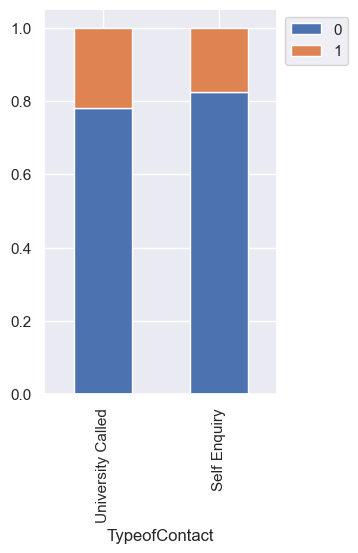

Taken              0    1   All
Occupation                     
All             3964  918  4882
Salaried        1950  414  2364
Small Business  1700  384  2084
Large Business   314  120   434
------------------------------------------------------------------------------------------------------------------------


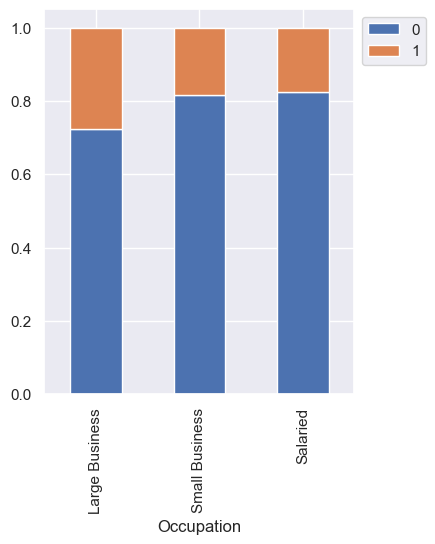

Taken                      0    1   All
PitchSatisfactionScore                 
All                     3964  918  4882
3                       1162  314  1476
5                        760  210   970
4                        750  162   912
1                        796  144   940
2                        496   88   584
------------------------------------------------------------------------------------------------------------------------


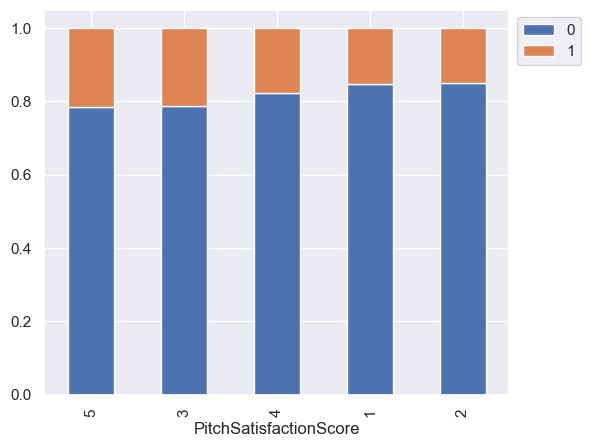

Taken                       0    1   All
BootcampPitched                         
All                      3964  918  4882
Python                   1286  550  1836
Digital Marketing        1528  204  1732
Microsoft Excel           618  124   742
R Programming             322   20   342
Social Media Psychology   210   20   230
------------------------------------------------------------------------------------------------------------------------


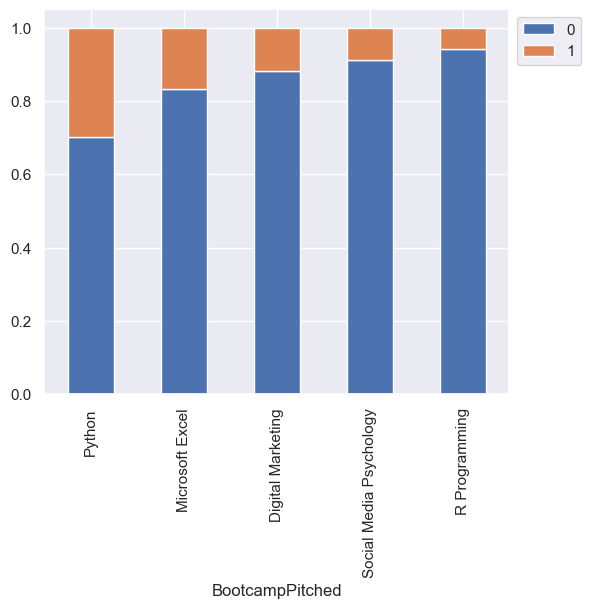

Taken             0    1   All
MaritalStatus                 
All            3964  918  4882
Single         1128  468  1596
Married        2012  326  2338
Divorced        824  124   948
------------------------------------------------------------------------------------------------------------------------


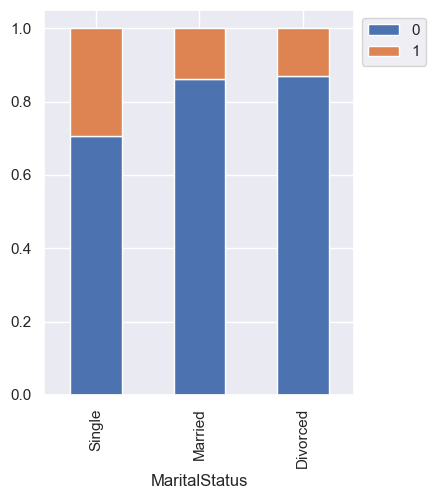

Taken      0    1   All
OwnCar                 
All     3964  918  4882
1       2468  560  3028
0       1496  358  1854
------------------------------------------------------------------------------------------------------------------------


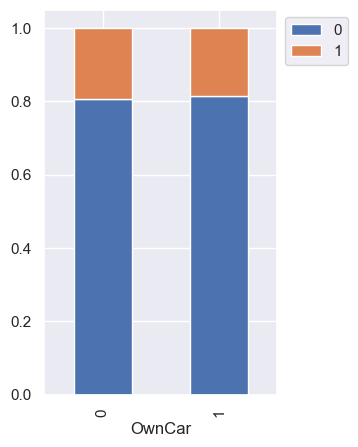

Taken              0    1   All
Designation                    
All             3964  918  4882
Executive       1286  550  1836
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


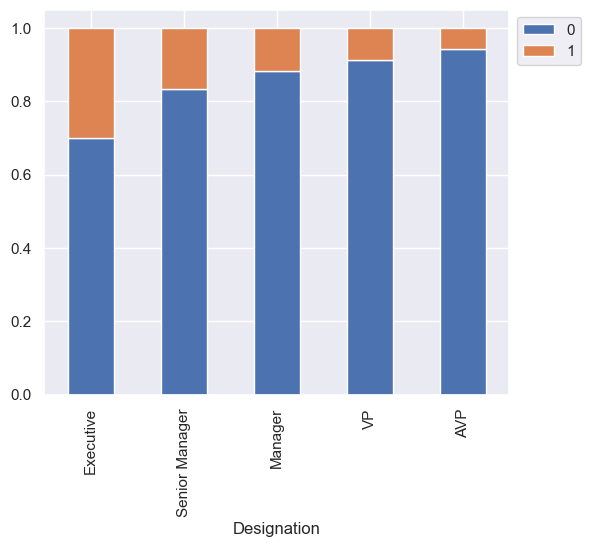

In [34]:
stacked_barplot(df2, 'NumberOfFollowups', 'Taken')
stacked_barplot(df2, 'TypeofContact', 'Taken')
stacked_barplot(df2, 'Occupation', 'Taken')
stacked_barplot(df2, 'PitchSatisfactionScore', 'Taken')
stacked_barplot(df2, 'BootcampPitched', 'Taken')
stacked_barplot(df2, 'MaritalStatus', 'Taken')
stacked_barplot(df2, 'OwnCar', 'Taken')
stacked_barplot(df2, 'Designation', 'Taken')

The proportion of individuals that have taken the bootcamp or not for Number of Followups seem to differ across its levels. A higher number of follow ups seem to have an increased rate in individuals taking the bootcamp, so we will take account of this feature in the analysis

The proportion of individuals that have taken the bootcamp or not for Type of Contact seem to only slightly differ across its levels, but since individuals that have been contacted by the university might have been individuals that had been targeted by the marketing department for it prospects; we will take account of this feature in analysis

The proportion of individuals that have taken the bootcamp or not for Occupation seem to differ slightly across its levels mostly due to large business with small business and salaried being similar, we will take account of this feature in analysis.

The proportion of individuals that have taken the bootcamp for PitchSatisfactionScore seem to increase with increasing duration, we will take account of this feature in analysis.

The proportion of individuals that have taken the bootcamp for Bootcamp Pitched seem to be the highest for Python, Excel, then Digital Marketing. This might be due to the university pitching Python much more than other subjects, but nevertheless this is an important feature so we will use it.

The proportion of individuals that have taken the bootcamp for Marital Status seem to be the highest for Single individuals, with similar propotions for Married and Divorced. We will take account of this feature in analysis.

The proportion of individuals that have taken the bootcamp for Owning a Car seem to be the same as not owning a car. This feature also seems to be irrelevant. We will not take account of this feature in analysis.

The proportion of individuals that have taken the bootcamp for Designation seem to be the highest for Executives, followed by Senior Manager, Manager VP and AVP. We will take account of this feature in analysis.

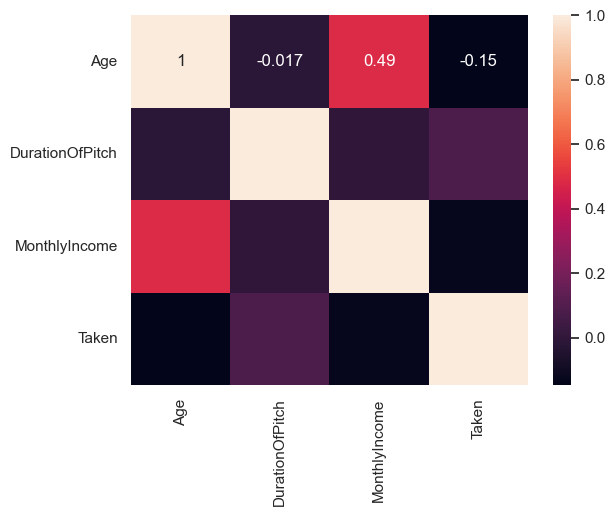

In [35]:
# Compute and plot correlation matrix
numeric = ['Age','DurationOfPitch','MonthlyIncome','Taken'] 

df2_numeric = df2[numeric]

sns.heatmap(df2_numeric.corr(), annot = True)

plt.rcParams['figure.figsize'] = (15,7)

plt.show()

It seems like all of the variables are not that highly correlated with each other, so we would not drop any of the numerical variables. Now we will start imputing

In [36]:
# Make sure our df has now OwnCar feature
df2 = df2.loc[:, df2.columns != 'OwnCar']

In [37]:
df2.columns
# OwnCar is dropped

Index(['Taken', 'Age', 'TypeofContact', 'CGPATier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfFollowups', 'BootcampPitched',
       'MaritalStatus', 'PitchSatisfactionScore', 'Designation',
       'MonthlyIncome'],
      dtype='object')

# Data Pre-processing

In [38]:
# Split data points into X (the features) and y (only the Taken feature)
clabel = 'Taken'
X = df2.drop(columns = [clabel])
y = df2[clabel].values

In [39]:
# Check y
np.unique(y)

array([0, 1])

In [40]:
# Check how many 1's in y
sum(y)/len(y)

0.18803768947152807

### We see that 18.8% of people in the dataset actually has taken the bootcamp. Because of this low percentage  when we split the data into training and testing, we use stratification in order to maintain the same percentage of people who has actually taken the bootcamp for both the training and testing set.

In [41]:
## Construct x_train, y_train, x_test, y_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42, stratify = y)

In [42]:
# Check for stratification
sum(y_train) / len(y_train)

0.1879641485275288

In [43]:
# Check for stratification
sum(y_test) / len(y_test)

0.18833162743091095

Stratify works as expected.

In [44]:
X_train.isna().sum()

Age                       172
TypeofContact              18
CGPATier                    0
DurationOfPitch           209
Occupation                  0
Gender                      0
NumberOfFollowups          33
BootcampPitched             0
MaritalStatus               0
PitchSatisfactionScore      0
Designation                 0
MonthlyIncome             187
dtype: int64

We will be using sklearns' simple impute for the imputing task

In [45]:
# Initiate simple imputers
imputer_mean = SimpleImputer(missing_values = np.nan, strategy ='mean')
imputer_median = SimpleImputer(missing_values = np.nan, strategy ='median')
imputer_mode = SimpleImputer(missing_values = np.nan, strategy ='most_frequent')

# Fit imputers on the training data
imputer_mean = imputer_mean.fit(X_train[['Age']])
imputer_median = imputer_median.fit(X_train[['DurationOfPitch', 'MonthlyIncome']])
imputer_mode = imputer_mode.fit(X_train[['TypeofContact', 'NumberOfFollowups']])

# Transform training data
X_train['Age'] = imputer_mean.transform(X_train[['Age']])
X_train[['DurationOfPitch', 'MonthlyIncome']] = imputer_median.transform(X_train[['DurationOfPitch', 'MonthlyIncome']])
X_train[['TypeofContact', 'NumberOfFollowups']] = imputer_mode.transform(X_train[['TypeofContact', 'NumberOfFollowups']])

# Transform test data
X_test['Age'] = imputer_mean.transform(X_test[['Age']])
X_test[['DurationOfPitch', 'MonthlyIncome']] = imputer_median.transform(X_test[['DurationOfPitch', 'MonthlyIncome']])
X_test[['TypeofContact', 'NumberOfFollowups']] = imputer_mode.transform(X_test[['TypeofContact', 'NumberOfFollowups']])

## Do the same for X for cross validation

In [46]:
# Fit imputers on the training data
imputer_mean = imputer_mean.fit(X[['Age']])
imputer_median = imputer_median.fit(X[['DurationOfPitch', 'MonthlyIncome']])
imputer_mode = imputer_mode.fit(X[['TypeofContact', 'NumberOfFollowups']])

# Transform X
X['Age'] = imputer_mean.transform(X[['Age']])
X[['DurationOfPitch', 'MonthlyIncome']] = imputer_median.transform(X[['DurationOfPitch', 'MonthlyIncome']])
X[['TypeofContact', 'NumberOfFollowups']] = imputer_mode.transform(X[['TypeofContact', 'NumberOfFollowups']])

# Scaling numerical variables

## For training and test data

In [47]:
# Apply the standard scaler to 'Age'
standardize = preprocessing.StandardScaler()
X_train['Age'] = standardize.fit_transform(X_train[['Age']])
X_test['Age'] = standardize.fit_transform(X_test[['Age']])

# Apply the min-max scaler to the other numerical columns
columns = ['DurationOfPitch','MonthlyIncome','NumberOfFollowups']
min_max = preprocessing.MinMaxScaler()
X_train[columns] = min_max.fit_transform(X_train[columns])
X_test[columns] = min_max.fit_transform(X_test[columns])

## For X

In [48]:
# Apply the standard scaler to 'Age'
standardize = preprocessing.StandardScaler()
X['Age'] = standardize.fit_transform(X[['Age']])

# Apply the min-max scaler to the other numerical columns
columns = ['DurationOfPitch','MonthlyIncome','NumberOfFollowups']
min_max = preprocessing.MinMaxScaler()
X[columns] = min_max.fit_transform(X[columns])

In [49]:
X.describe()

,Age,CGPATier,DurationOfPitch,NumberOfFollowups,PitchSatisfactionScore,MonthlyIncome
count,4.882000e+03,4882.000000,4882.000000,4882.000000,4882.000000,4882.000000
mean,1.746520e-17,1.654240,0.332961,0.542114,3.079476,0.598046
std,1.000102e+00,0.916551,0.258377,0.199693,1.365807,0.133923
min,-2.155900e+00,1.000000,0.000000,0.000000,1.000000,0.000000
25%,-7.273873e-01,1.000000,0.129032,0.400000,2.000000,0.517166
50%,-6.807385e-02,1.000000,0.258065,0.600000,3.000000,0.566685
75%,5.912396e-01,3.000000,0.451613,0.600000,4.000000,0.648134
max,2.569180e+00,3.000000,1.000000,1.000000,5.000000,1.000000


In [50]:
X_train.describe()
X_test.describe()

,Age,CGPATier,DurationOfPitch,NumberOfFollowups,PitchSatisfactionScore,MonthlyIncome
count,9.770000e+02,977.000000,977.000000,977.000000,977.000000,977.000000
mean,6.545430e-17,1.645855,0.338429,0.535517,3.014330,0.335833
std,1.000512e+00,0.910698,0.260565,0.199327,1.360222,0.221480
min,-2.269936e+00,1.000000,0.000000,0.000000,1.000000,0.000000
25%,-7.595380e-01,1.000000,0.129032,0.400000,2.000000,0.205516
50%,-6.243150e-02,1.000000,0.258065,0.600000,3.000000,0.279165
75%,6.346750e-01,3.000000,0.483871,0.600000,4.000000,0.418171
max,2.725995e+00,3.000000,1.000000,1.000000,5.000000,1.000000


In [51]:
# Check if there are missing values
X_train.isnull().sum()
X_test.isnull().sum()

Age                       0
TypeofContact             0
CGPATier                  0
DurationOfPitch           0
Occupation                0
Gender                    0
NumberOfFollowups         0
BootcampPitched           0
MaritalStatus             0
PitchSatisfactionScore    0
Designation               0
MonthlyIncome             0
dtype: int64

# Encode categorical variables 

## Encode binary feature

In [52]:
# Encode gender / 0 and 1
le_G = LabelEncoder()

col = 'Gender'
# Fit the label encoder
le_G = le_G.fit(X_train[col])

# Do the transformation
X_train[col] = le_G.transform(X_train[col])
X_test[col] = le_G.transform(X_test[col])

In [53]:
# Check transformation
X_train

,Age,TypeofContact,CGPATier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,BootcampPitched,MaritalStatus,PitchSatisfactionScore,Designation,MonthlyIncome
924,0.000000,Self Enquiry,1,0.225806,Salaried,1,0.4,Python,Divorced,3,Executive,0.464634
621,-0.178024,Self Enquiry,3,0.032258,Salaried,1,0.4,Digital Marketing,Divorced,3,Manager,0.536163
4038,-0.611884,Self Enquiry,3,0.258065,Salaried,1,1.0,Digital Marketing,Married,3,Manager,0.633012
1831,0.255835,Self Enquiry,1,0.354839,Salaried,0,0.0,Python,Married,3,Executive,0.430316
2667,0.147371,Self Enquiry,3,0.161290,Salaried,1,0.6,Microsoft Excel,Married,2,Senior Manager,0.750776
...,...,...,...,...,...,...,...,...,...,...,...,...
2051,0.000000,Self Enquiry,1,0.032258,Salaried,1,0.8,Python,Married,4,Executive,0.566579
3208,-0.937279,Self Enquiry,3,0.258065,Small Business,1,0.6,Python,Divorced,5,Executive,0.497120
2801,-1.696534,University Called,3,0.064516,Large Business,0,0.8,Python,Single,5,Executive,0.526900
1237,-0.611884,Self Enquiry,3,0.032258,Salaried,1,0.8,Digital Marketing,Single,3,Manager,0.550336


## For X

In [54]:
# Encode gender / 0 and 1
col = 'Gender'

le_G = le_G.fit(X[col])

X[col] = le_G.transform(X[col])

In [55]:
# Check transformation
X

,Age,TypeofContact,CGPATier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,BootcampPitched,MaritalStatus,PitchSatisfactionScore,Designation,MonthlyIncome
0,0.371468,Self Enquiry,3,0.032258,Salaried,0,0.4,Digital Marketing,Single,2,Manager,0.530642
1,1.250553,University Called,1,0.290323,Salaried,1,0.6,Digital Marketing,Divorced,3,Manager,0.507737
3,-0.507616,University Called,1,0.129032,Salaried,0,0.4,Python,Divorced,5,Executive,0.448788
4,0.000000,Self Enquiry,1,0.096774,Small Business,1,0.4,Python,Divorced,5,Executive,0.463625
5,-0.617502,University Called,1,0.096774,Salaried,1,0.4,Python,Single,5,Executive,0.453008
...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1.250553,Self Enquiry,3,0.129032,Small Business,1,0.8,Digital Marketing,Single,1,Manager,0.678823
4884,-1.057044,University Called,1,0.838710,Salaried,1,0.8,Python,Single,3,Executive,0.536455
4885,1.580210,Self Enquiry,3,0.387097,Salaried,0,0.6,Microsoft Excel,Married,1,Senior Manager,0.818006
4886,-2.046014,Self Enquiry,3,0.354839,Small Business,1,0.6,Python,Single,5,Executive,0.511957


## Encode nominal features

In [56]:
# Initiate OHE, fit and transform the respective features
ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
ohetransform = ohe.fit_transform(X_train[['TypeofContact', 'Occupation', 'BootcampPitched', 
                     'MaritalStatus', 'Designation']])
ohetransform1 = ohe.fit_transform(X_test[['TypeofContact', 'Occupation', 'BootcampPitched', 
                     'MaritalStatus', 'Designation']])

In [57]:
# Check transformation
ohetransform
ohetransform1

,TypeofContact_Self Enquiry,TypeofContact_University Called,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,BootcampPitched_Digital Marketing,BootcampPitched_Microsoft Excel,BootcampPitched_Python,BootcampPitched_R Programming,BootcampPitched_Social Media Psychology,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
3515,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1145,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1811,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1171,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2750,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3634,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1268,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3794,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [58]:
# Concat the modified and drop the original nominal features
X_train = pd.concat([X_train, ohetransform], axis = 1).drop(columns = ['TypeofContact', 'Occupation', 'BootcampPitched', 
                     'MaritalStatus', 'Designation'] )
X_test = pd.concat([X_test, ohetransform1], axis = 1).drop(columns = ['TypeofContact', 'Occupation', 'BootcampPitched', 
                     'MaritalStatus', 'Designation'] )

In [59]:
X_train

,Age,CGPATier,DurationOfPitch,Gender,NumberOfFollowups,PitchSatisfactionScore,MonthlyIncome,TypeofContact_Self Enquiry,TypeofContact_University Called,Occupation_Large Business,...,BootcampPitched_R Programming,BootcampPitched_Social Media Psychology,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
924,0.000000,1,0.225806,1,0.4,3,0.464634,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
621,-0.178024,3,0.032258,1,0.4,3,0.536163,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4038,-0.611884,3,0.258065,1,1.0,3,0.633012,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1831,0.255835,1,0.354839,0,0.0,3,0.430316,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2667,0.147371,3,0.161290,1,0.6,2,0.750776,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,0.000000,1,0.032258,1,0.8,4,0.566579,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3208,-0.937279,3,0.258065,1,0.6,5,0.497120,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2801,-1.696534,3,0.064516,0,0.8,5,0.526900,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1237,-0.611884,3,0.032258,1,0.8,3,0.550336,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [60]:
X_test

,Age,CGPATier,DurationOfPitch,Gender,NumberOfFollowups,PitchSatisfactionScore,MonthlyIncome,TypeofContact_Self Enquiry,TypeofContact_University Called,Occupation_Large Business,...,BootcampPitched_R Programming,BootcampPitched_Social Media Psychology,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
3515,1.447966,1,0.161290,0,0.8,3,0.328825,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1145,-0.178616,1,0.258065,0,0.4,1,0.160156,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1811,0.053753,1,0.516129,1,0.6,5,0.463752,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1171,0.286122,1,0.258065,1,0.4,3,0.049439,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2750,-0.527169,3,0.290323,1,0.8,3,0.359642,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.983228,2,0.193548,1,0.6,5,0.176030,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3634,-0.527169,1,0.129032,1,0.6,4,0.359021,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1268,1.796519,1,0.032258,0,0.6,1,0.528267,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3794,-1.108091,3,0.129032,0,0.2,1,0.404691,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## For X

In [61]:
# Do the same for X
ohetransformX = ohe.fit_transform(X[['TypeofContact', 'Occupation', 'BootcampPitched', 
                     'MaritalStatus', 'Designation']])

In [62]:
# Check transformation
ohetransformX

,TypeofContact_Self Enquiry,TypeofContact_University Called,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,BootcampPitched_Digital Marketing,BootcampPitched_Microsoft Excel,BootcampPitched_Python,BootcampPitched_R Programming,BootcampPitched_Social Media Psychology,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4884,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4885,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4886,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [63]:
# Concat the modified and drop the original nominal features
X = pd.concat([X, ohetransformX], axis = 1).drop(columns = ['TypeofContact', 'Occupation', 'BootcampPitched', 
                     'MaritalStatus', 'Designation'] )

In [64]:
X

,Age,CGPATier,DurationOfPitch,Gender,NumberOfFollowups,PitchSatisfactionScore,MonthlyIncome,TypeofContact_Self Enquiry,TypeofContact_University Called,Occupation_Large Business,...,BootcampPitched_R Programming,BootcampPitched_Social Media Psychology,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,0.371468,3,0.032258,0,0.4,2,0.530642,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.250553,1,0.290323,1,0.6,3,0.507737,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.507616,1,0.129032,0,0.4,5,0.448788,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.000000,1,0.096774,1,0.4,5,0.463625,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,-0.617502,1,0.096774,1,0.4,5,0.453008,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1.250553,3,0.129032,1,0.8,1,0.678823,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4884,-1.057044,1,0.838710,1,0.8,3,0.536455,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4885,1.580210,3,0.387097,0,0.6,1,0.818006,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4886,-2.046014,3,0.354839,1,0.6,5,0.511957,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


## Now we encode the ordinal variables

In [65]:
# Initiate Ordinal Encoder, fit, and transform the respective features
# ordinal_cols = ['CGPATier','PitchSatisfactionScore']

print("Unique values before encoding:", X_train['CGPATier'].unique())
CGPA_Tier = [1, 2, 3]
ode1 = OrdinalEncoder(categories = [CGPA_Tier])
X_train['CGPATier'] = ode1.fit_transform(X_train[['CGPATier']])
print("Unique values after encoding:", X_train['CGPATier'].unique())

# 1, 2, 3 becomes 0.0 1.0 2.0

print("Unique values before encoding:", X_train['PitchSatisfactionScore'].unique())
Pitch_Tier = [1, 2, 3, 4, 5]
ode2 = OrdinalEncoder(categories = [Pitch_Tier])
X_train['PitchSatisfactionScore'] = ode2.fit_transform(X_train[['PitchSatisfactionScore']])
print("Unique values after encoding:", X_train['PitchSatisfactionScore'].unique())

print("Unique values before encoding:", X_test['CGPATier'].unique())
X_test['CGPATier'] = ode1.fit_transform(X_test[['CGPATier']])
print("Unique values after encoding:", X_test['CGPATier'].unique())

print("Unique values before encoding:", X_test['PitchSatisfactionScore'].unique())
X_test['PitchSatisfactionScore'] = ode2.fit_transform(X_test[['PitchSatisfactionScore']])
print("Unique values after encoding:", X_test['PitchSatisfactionScore'].unique())

Unique values before encoding: [1 3 2]
Unique values after encoding: [0. 2. 1.]
Unique values before encoding: [3 2 1 5 4]
Unique values after encoding: [2. 1. 0. 4. 3.]
Unique values before encoding: [1 3 2]
Unique values after encoding: [0. 2. 1.]
Unique values before encoding: [3 1 5 4 2]
Unique values after encoding: [2. 0. 4. 3. 1.]


In [66]:
# Verify again
X_train

,Age,CGPATier,DurationOfPitch,Gender,NumberOfFollowups,PitchSatisfactionScore,MonthlyIncome,TypeofContact_Self Enquiry,TypeofContact_University Called,Occupation_Large Business,...,BootcampPitched_R Programming,BootcampPitched_Social Media Psychology,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
924,0.000000,0.0,0.225806,1,0.4,2.0,0.464634,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
621,-0.178024,2.0,0.032258,1,0.4,2.0,0.536163,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4038,-0.611884,2.0,0.258065,1,1.0,2.0,0.633012,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1831,0.255835,0.0,0.354839,0,0.0,2.0,0.430316,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2667,0.147371,2.0,0.161290,1,0.6,1.0,0.750776,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,0.000000,0.0,0.032258,1,0.8,3.0,0.566579,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3208,-0.937279,2.0,0.258065,1,0.6,4.0,0.497120,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2801,-1.696534,2.0,0.064516,0,0.8,4.0,0.526900,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1237,-0.611884,2.0,0.032258,1,0.8,2.0,0.550336,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [67]:
# Verify again
X_test

,Age,CGPATier,DurationOfPitch,Gender,NumberOfFollowups,PitchSatisfactionScore,MonthlyIncome,TypeofContact_Self Enquiry,TypeofContact_University Called,Occupation_Large Business,...,BootcampPitched_R Programming,BootcampPitched_Social Media Psychology,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
3515,1.447966,0.0,0.161290,0,0.8,2.0,0.328825,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1145,-0.178616,0.0,0.258065,0,0.4,0.0,0.160156,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1811,0.053753,0.0,0.516129,1,0.6,4.0,0.463752,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1171,0.286122,0.0,0.258065,1,0.4,2.0,0.049439,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2750,-0.527169,2.0,0.290323,1,0.8,2.0,0.359642,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.983228,1.0,0.193548,1,0.6,4.0,0.176030,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3634,-0.527169,0.0,0.129032,1,0.6,3.0,0.359021,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1268,1.796519,0.0,0.032258,0,0.6,0.0,0.528267,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3794,-1.108091,2.0,0.129032,0,0.2,0.0,0.404691,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## For X

In [68]:
# Verify before and after
print("Unique values before encoding:", X['CGPATier'].unique())
X['CGPATier'] = ode1.fit_transform(X[['CGPATier']])
print("Unique values after encoding:", X['CGPATier'].unique())

print("Unique values before encoding:", X['PitchSatisfactionScore'].unique())
X['PitchSatisfactionScore'] = ode2.fit_transform(X[['PitchSatisfactionScore']])
print("Unique values after encoding:", X['PitchSatisfactionScore'].unique())

Unique values before encoding: [3 1 2]
Unique values after encoding: [2. 0. 1.]
Unique values before encoding: [2 3 5 4 1]
Unique values after encoding: [1. 2. 4. 3. 0.]


In [69]:
# Verify again
X

,Age,CGPATier,DurationOfPitch,Gender,NumberOfFollowups,PitchSatisfactionScore,MonthlyIncome,TypeofContact_Self Enquiry,TypeofContact_University Called,Occupation_Large Business,...,BootcampPitched_R Programming,BootcampPitched_Social Media Psychology,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,0.371468,2.0,0.032258,0,0.4,1.0,0.530642,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.250553,0.0,0.290323,1,0.6,2.0,0.507737,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.507616,0.0,0.129032,0,0.4,4.0,0.448788,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.000000,0.0,0.096774,1,0.4,4.0,0.463625,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,-0.617502,0.0,0.096774,1,0.4,4.0,0.453008,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1.250553,2.0,0.129032,1,0.8,0.0,0.678823,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4884,-1.057044,0.0,0.838710,1,0.8,2.0,0.536455,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4885,1.580210,2.0,0.387097,0,0.6,0.0,0.818006,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4886,-2.046014,2.0,0.354839,1,0.6,4.0,0.511957,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


### All features look appropriate we proceed to building models

In [70]:
X_train.dtypes

Age                                        float64
CGPATier                                   float64
DurationOfPitch                            float64
Gender                                       int64
NumberOfFollowups                          float64
PitchSatisfactionScore                     float64
MonthlyIncome                              float64
TypeofContact_Self Enquiry                 float64
TypeofContact_University Called            float64
Occupation_Large Business                  float64
Occupation_Salaried                        float64
Occupation_Small Business                  float64
BootcampPitched_Digital Marketing          float64
BootcampPitched_Microsoft Excel            float64
BootcampPitched_Python                     float64
BootcampPitched_R Programming              float64
BootcampPitched_Social Media Psychology    float64
MaritalStatus_Divorced                     float64
MaritalStatus_Married                      float64
MaritalStatus_Single           

In [71]:
X_test.dtypes

Age                                        float64
CGPATier                                   float64
DurationOfPitch                            float64
Gender                                       int64
NumberOfFollowups                          float64
PitchSatisfactionScore                     float64
MonthlyIncome                              float64
TypeofContact_Self Enquiry                 float64
TypeofContact_University Called            float64
Occupation_Large Business                  float64
Occupation_Salaried                        float64
Occupation_Small Business                  float64
BootcampPitched_Digital Marketing          float64
BootcampPitched_Microsoft Excel            float64
BootcampPitched_Python                     float64
BootcampPitched_R Programming              float64
BootcampPitched_Social Media Psychology    float64
MaritalStatus_Divorced                     float64
MaritalStatus_Married                      float64
MaritalStatus_Single           

# First Model - KNN
## We will start with 2 neighbours because it is expected that there will be 2 groups of points that is taken or not

In [72]:
from sklearn.neighbors import KNeighborsClassifier

# Build base KNN model and fit it

knn_model = KNeighborsClassifier(n_neighbors = 2, weights = 'distance')
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [73]:
from sklearn.metrics import accuracy_score, f1_score

# Now we predict the accuracy and F1 score

y_pred = knn_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)
# accuracy is pretty high 92.22% but this is negligible due to class imbalance.

f1 = f1_score(y_test, y_pred, average='weighted') # weighted for imbalanced data.

# Print F1 score
print(f"F1 Score on test set: {f1}")

## Relative high f1 score

0.9222108495394064
F1 Score on test set: 0.9229930135660408


## Hyperparameter Tuning

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, f1_score

# Use GridSearchCV to test all values for n_neighbors
param_grid = {
    'n_neighbors': np.arange(1, 20),
    'weights':['distance']
}

# Fit model with F1 score as the evaluation metric with cross-validation of 5 fold
knn_cv = GridSearchCV(
    KNeighborsClassifier(weights='distance'), 
    param_grid, 
    cv=5, 
    scoring= 'f1_weighted')
knn_cv.fit(X, y)

# Get the best parameter and best score
best_param = knn_cv.best_params_
print("Best F1 score:", knn_cv.best_score_)
print("Best parameter:", best_param)

Best F1 score: 0.9668518879394201
Best parameter: {'n_neighbors': 1, 'weights': 'distance'}


When k is small, KNN has high variance, but low bias.
When k is large, KNN has low variance, but high bias.

After experimenting a few times the hyperparameters will always take the lowest value but since this can result in the model to effectively capture the true relationship in the training set (overfitting). When compared to the test set, there will be substantial differences in predictions so we will interpret with caution.

## Remodelling

In [75]:
# Re-model using best_params, fit then look for F1 score
knn_model2 = KNeighborsClassifier(n_neighbors = 1, weights='distance')
knn_model2.fit(X_train, y_train)

y_pred1 = knn_model2.predict(X_test)

f1 = f1_score(y_test, y_pred1, average='weighted')

# Print F1 score
print(f"F1 Score on test set: {f1}")

F1 Score on test set: 0.9229930135660408


## Confusion matrix

In [76]:
# Define confusion matrix
def make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True, xyplotlabels=True, sum_stats=True,
    figsize=None, cmap='Blues', title=None): 
    
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]
    
    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks
    
    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)] 
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels, group_counts ,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])
    
    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations 
        accuracy = np.trace(cf) / float(np.sum(cf))
        
    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False 
        categories=False
        
    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf, annot=box_labels, fmt="", cmap=cmap, cbar=cbar,
                xticklabels=categories , yticklabels=categories)
    if title: 
        plt.title(title)

[[750  43]
 [ 33 151]]


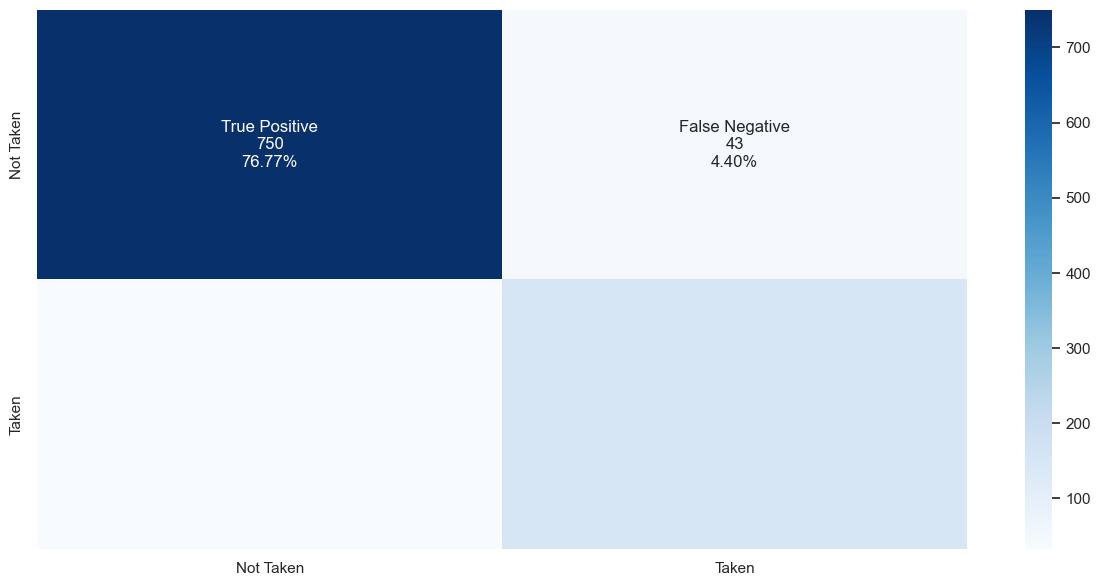

In [77]:
# Build confusion matrix based on remodelled KNN
y_pred1 = knn_model2.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred1).ravel()
print(confusion_matrix(y_test, y_pred1))

# Make confusion matrix
cm = confusion_matrix(y_test, y_pred)
label = ['True Positive', 'False Negative', 'False Positive','True Negative']
cat = ['Not Taken','Taken']

# Plot confusion matrix
make_confusion_matrix(cm, group_names = label, categories = cat, cmap = 'Blues')

In [78]:
# Build the classfication report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       793
           1       0.78      0.82      0.80       184

    accuracy                           0.92       977
   macro avg       0.87      0.88      0.88       977
weighted avg       0.92      0.92      0.92       977



# Second model SVM
## By default SVM uses the radial basis function

In [79]:
# Initialize base SVC model with class_weight set to 'balanced'
svm = SVC(random_state=42, class_weight='balanced')

# Fit the base model on the training data
svm.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=42)

In [80]:
# Now we find out the F1 score for the base model
y_pred = svm.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted') # weighted for imbalanced data.

# Print F1 score
print(f"F1 Score on test set: {f1}")

F1 Score on test set: 0.7495900390641576


## Hyperparameter tuning

In [81]:
from sklearn.model_selection import GridSearchCV

# Define properties for the model, to feed into GridSearchCV
param_grid = {
    'C': [0.5, 1, 10, 100, 200],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf'],
    'class_weight': ['balanced']
}

# Initiate GridSearchCV based on weighted F1
optimal_params = GridSearchCV(
    SVC(), 
    param_grid, 
    cv = 5,
    scoring = 'f1_weighted',
    verbose = 0
    )

# Fit the optimised SVM model
optimal_params.fit(X_train, y_train) 

# Print best parameter and score
best_param = optimal_params.best_params_
print(best_param)
print(optimal_params.best_score_)

{'C': 100, 'class_weight': 'balanced', 'gamma': 1, 'kernel': 'rbf'}
0.9116271476772859


We see the ideal value of C is 100, and gamma is 0.1. We will stick to rbf as it is generally the best model out of all the rest of the kernels, and due to a very long processing time.

## Remodelling using best parameter

In [82]:
# Re-model using best_params, fit then look for F1 score
svm2 = SVC(C = 100, class_weight = 'balanced', gamma = 1, kernel = 'rbf')

svm2.fit(X_train, y_train)

y_pred2 = svm2.predict(X_test)

f1 = f1_score(y_test, y_pred2, average='weighted') # weighted for imbalanced data.

# Print F1 score
print(f"F1 Score on test set: {f1}")

F1 Score on test set: 0.9065628766437674


## Confusion Matrix

[[749  44]
 [ 47 137]]


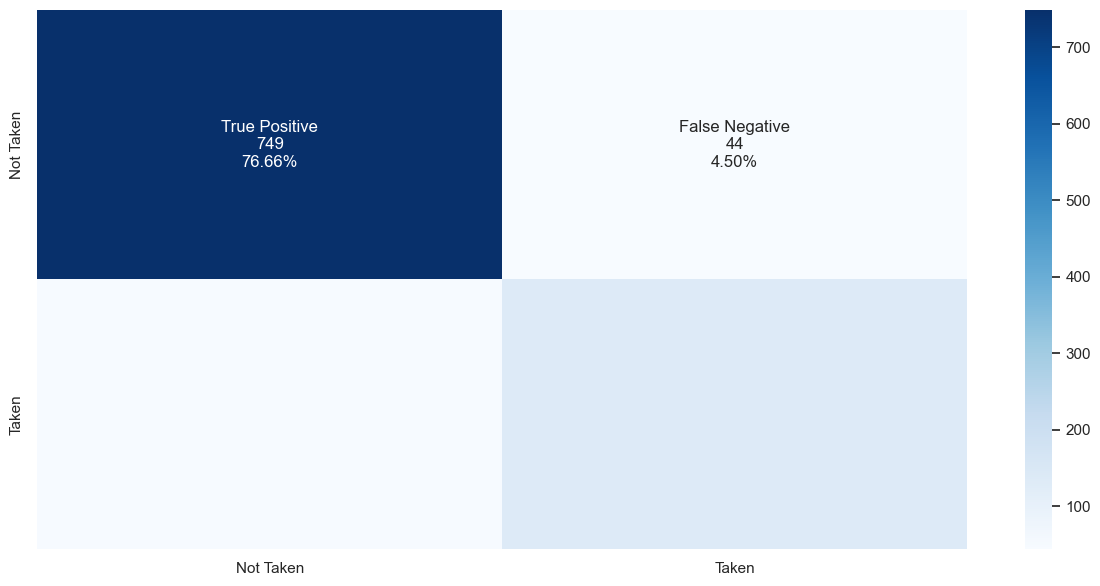

In [83]:
# Build confusion matrix based on remodelled SVM
tn, fp, fn, tp = confusion_matrix(y_test, y_pred2).ravel()
print(confusion_matrix(y_test, y_pred2))

# Make confusion matrix
cm = confusion_matrix(y_test, y_pred2)
group_names = ['Not Taken','Taken']

# Plot confusion matrix
make_confusion_matrix(cm, group_names = label, categories = cat, cmap = 'Blues')

In [84]:
# Build classfication report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred2)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       793
           1       0.76      0.74      0.75       184

    accuracy                           0.91       977
   macro avg       0.85      0.84      0.85       977
weighted avg       0.91      0.91      0.91       977



# Third model Decision Tree
## Preliminary Decision Tree

In [85]:
from sklearn import tree

#Define the decision tree model
dt = tree.DecisionTreeClassifier(random_state = 42, class_weight = 'balanced')

#Fit the model with train set
dt = dt.fit(X_train, y_train)

#Prediction using test set
y_pred = dt.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted') # weighted for imbalanced data.

# Print F1 score
print(f"F1 Score on test set: {f1}")

F1 Score on test set: 0.7639379068054871


In [86]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [87]:
# Define properties for the model, to feed into GridSearchCV
param_grid = {
    'max_depth' : [50, 100, 150, 200, 250],
    'max_features' : [5, 10, 15, 20, 25, 30],
    'min_samples_leaf' : [1, 2 , 3, 4, 5],
    'min_samples_split' : [2 ,4, 6, 8, 10, 12],
    'class_weight' : ['balanced']
}

# Initiate GridSearchCV based on weighted F1
optimal_params_tree = GridSearchCV(
    DecisionTreeClassifier(), 
    param_grid, 
    cv = 5,
    scoring = 'f1_weighted',
    verbose = 0
    )

# Fit the optimised SVM model
optimal_params_tree.fit(X_train, y_train) 

# Print Best parameter and score from grid search
best_param = optimal_params_tree.best_params_
print(best_param)
print(optimal_params_tree.best_score_)

{'class_weight': 'balanced', 'max_depth': 250, 'max_features': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.8687498752924991


We notice many of the parameters are not clear cut even after cross validation and experimenting so we graph several of the properties.

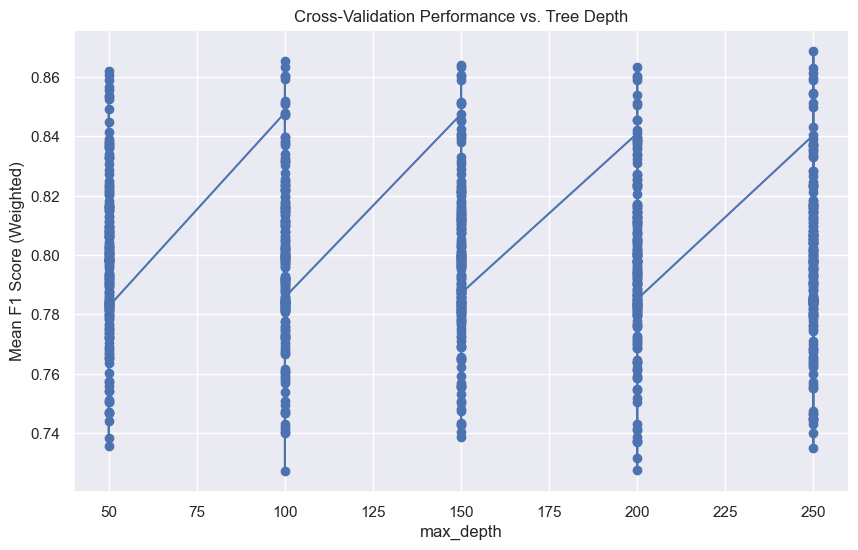

In [88]:
# Extract cross-validation results
cv_results = optimal_params_tree.cv_results_
mean_test_scores = cv_results['mean_test_score']
param_depths = cv_results['param_max_depth'].data

# Plot Tree Depth
plt.figure(figsize=(10, 6))
plt.plot(param_depths, mean_test_scores, marker='o')
plt.xlabel('max_depth')
plt.ylabel('Mean F1 Score (Weighted)')
plt.title('Cross-Validation Performance vs. Tree Depth')
plt.grid(True)
plt.show()

Tree depth = 200 seems optimal as indicated by CV.

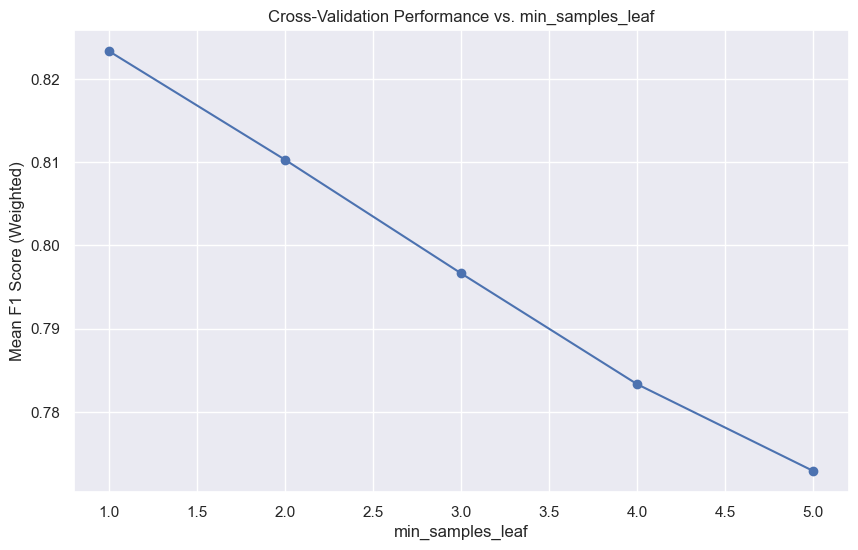

In [89]:
# Extract the mean test scores and the corresponding `min_samples_leaf` values
param_min_samples_leaf = cv_results['param_min_samples_leaf'].data

# Create a DataFrame from the CV results
results_df = pd.DataFrame(cv_results)

# Group by `min_samples_leaf` and calculate the mean F1 score for each value
grouped_results = results_df.groupby('param_min_samples_leaf')['mean_test_score'].mean()

# Plot Min Samples Leaf
plt.figure(figsize=(10, 6))
plt.plot(grouped_results.index, grouped_results.values, marker='o', linestyle='-', color='b')
plt.xlabel('min_samples_leaf')
plt.ylabel('Mean F1 Score (Weighted)')
plt.title('Cross-Validation Performance vs. min_samples_leaf')
plt.grid(True)
plt.show()

Min Samples leaf = 1 might overfit, so we strike the balance b/w bias and variance by choosing min samples leaf = 3

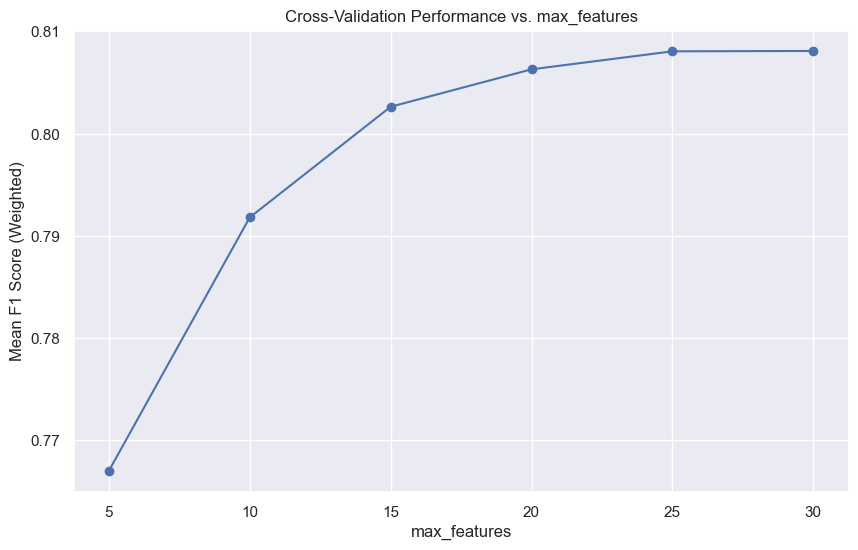

In [90]:
# Extract the mean test scores and the corresponding `param_max_features` values
param_max_features = cv_results['param_max_features'].data

# Create a DataFrame from the CV results
results_df1 = pd.DataFrame(cv_results)

# Group by `max_features` and calculate the mean F1 score for each value
grouped_results1 = results_df1.groupby('param_max_features')['mean_test_score'].mean()

# Plot Max Features
plt.figure(figsize=(10, 6))
plt.plot(grouped_results1.index, grouped_results1.values, marker='o', linestyle='-', color='b')
plt.xlabel('max_features')
plt.ylabel('Mean F1 Score (Weighted)')
plt.title('Cross-Validation Performance vs. max_features')
plt.grid(True)
plt.show()

Max Features = 15 seems optimal as indicated by CV.

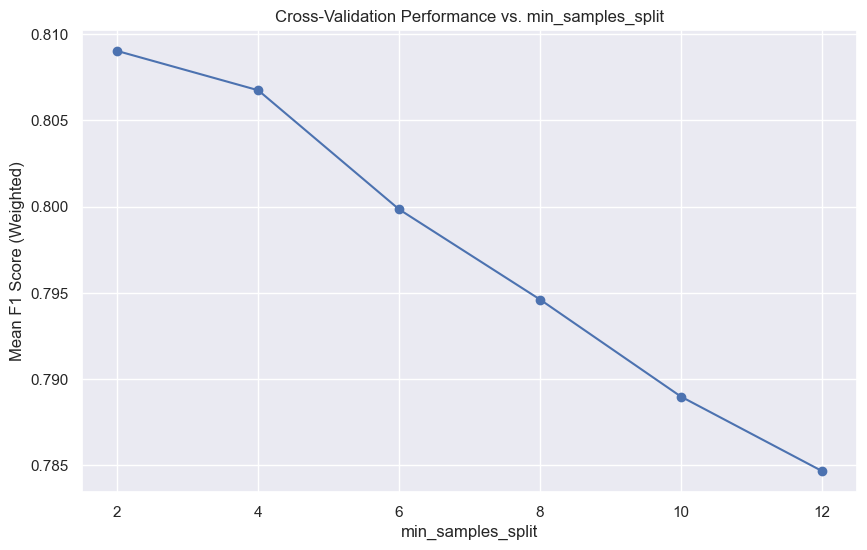

In [91]:
# Extract the mean test scores and the corresponding `param_min_samples_split` values
param_min_samples_split = cv_results['param_min_samples_split'].data

# Create a DataFrame from the CV results
results_df2 = pd.DataFrame(cv_results)

# Group by `min_samples_split` and calculate the mean F1 score for each value
grouped_results2 = results_df2.groupby('param_min_samples_split')['mean_test_score'].mean()

# Plot min samples split
plt.figure(figsize=(10, 6))
plt.plot(grouped_results2.index, grouped_results2.values, marker='o', linestyle='-', color='b')
plt.xlabel('min_samples_split')
plt.ylabel('Mean F1 Score (Weighted)')
plt.title('Cross-Validation Performance vs. min_samples_split')
plt.grid(True)
plt.show()

Min Samples Split is 2 as indicated in the sklearn package, as this may lead to overfit due to lower samples needed to split the nodes, we choose 7 to strike the balance b/w bias and varaince. 

## Remodel using best params

In [92]:
# Re-model using best_params, fit then look for F1 score
dt_new = tree.DecisionTreeClassifier(random_state = 42, class_weight = 'balanced', max_depth = 200, 
                                     min_samples_leaf = 3, min_samples_split = 7, max_features = 15)

dt.new = dt_new.fit(X_train, y_train)
y_pred_new = dt_new.predict(X_test)

f1 = f1_score(y_test, y_pred_new, average='weighted') # weighted for imbalanced data.

# Print F1 score
print(f"F1 Score on test set: {f1}")

F1 Score on test set: 0.7175057624262577


## Confusion Matrix

[[539 254]
 [ 54 130]]


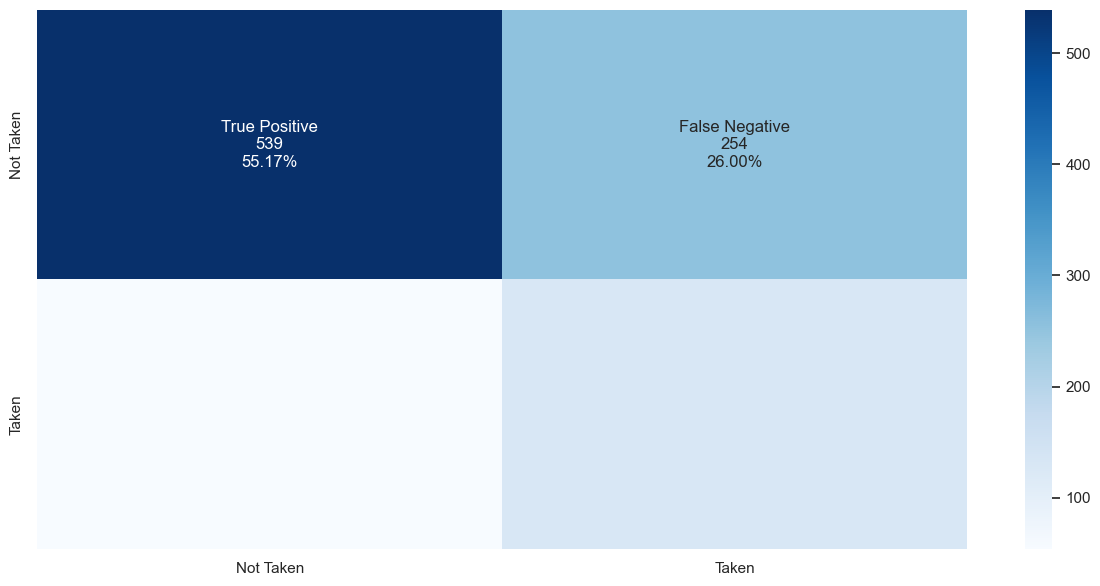

In [93]:
# Build confusion matrix based on remodelled Decision Trees
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_new).ravel()
print(confusion_matrix(y_test, y_pred_new))

# Make confusion matrix
cm = confusion_matrix(y_test, y_pred_new)
group_names = ['Not Taken', 'Taken']

# Plot confusion matrix
make_confusion_matrix(cm, group_names = label, categories = cat, cmap = 'Blues')

In [94]:
# Build Classification report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       793
           1       0.38      0.53      0.44       184

    accuracy                           0.75       977
   macro avg       0.63      0.67      0.64       977
weighted avg       0.79      0.75      0.76       977



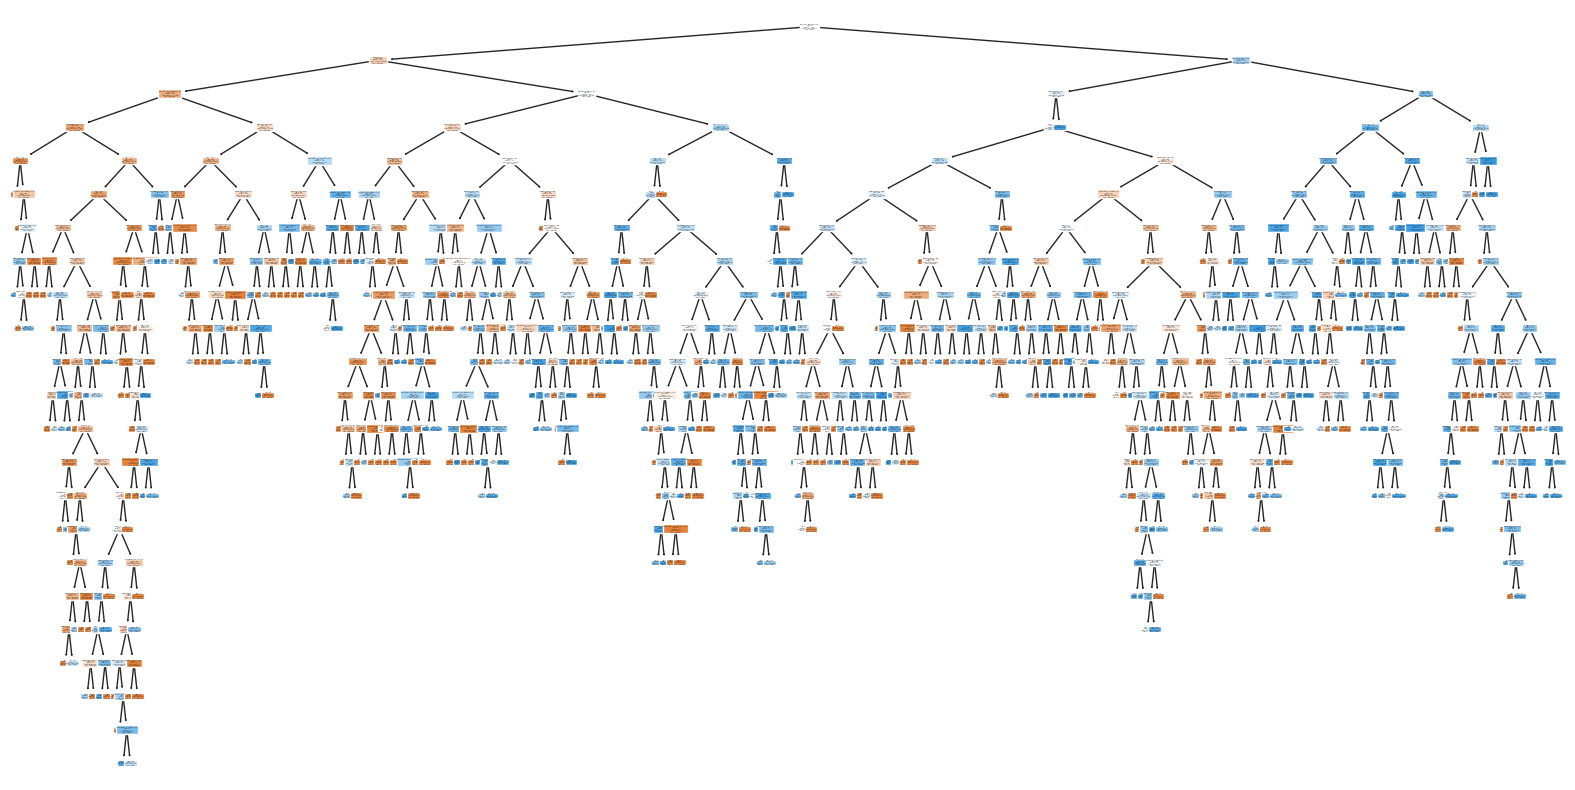

In [95]:
from sklearn.tree import plot_tree

# Specify feature names
feature_names = ['Age', 'CGPATier', 'DurationOfPitch', 'Gender', 
                 'NumberOfFollowups', 'PitchSatisfactionScore', 'MonthlyIncome', 
                 'TypeofContact_Self Enquiry', 'TypeofContact_University Called', 
                 'Occupation_Large Business', 'Occupation_Salaried', 
                 'Occupation_Small Business', 'BootcampPitched_Digital Marketing', 
                 'BootcampPitched_Microsoft Excel', 'BootcampPitched_Python', 
                 'BootcampPitched_R Programming', 'BootcampPitched_Social Media Psychology', 
                 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 
                 'Designation_AVP', 'Designation_Executive', 'Designation_Manager', 
                 'Designation_Senior Manager', 'Designation_VP']  

# Specify class names
class_names = ['Not Taken', 'Taken']  

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt.new, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

To crowded, we will instead use feature importance

                                    Feature  Importance
2                           DurationOfPitch    0.169777
0                                       Age    0.169716
6                             MonthlyIncome    0.166263
21                    Designation_Executive    0.086826
5                    PitchSatisfactionScore    0.077731
1                                  CGPATier    0.060182
4                         NumberOfFollowups    0.059853
19                     MaritalStatus_Single    0.055073
11                Occupation_Small Business    0.028057
8           TypeofContact_University Called    0.018756
3                                    Gender    0.017805
7                TypeofContact_Self Enquiry    0.016450
10                      Occupation_Salaried    0.015595
23               Designation_Senior Manager    0.014368
9                 Occupation_Large Business    0.010163
15            BootcampPitched_R Programming    0.006811
22                      Designation_Manager    0

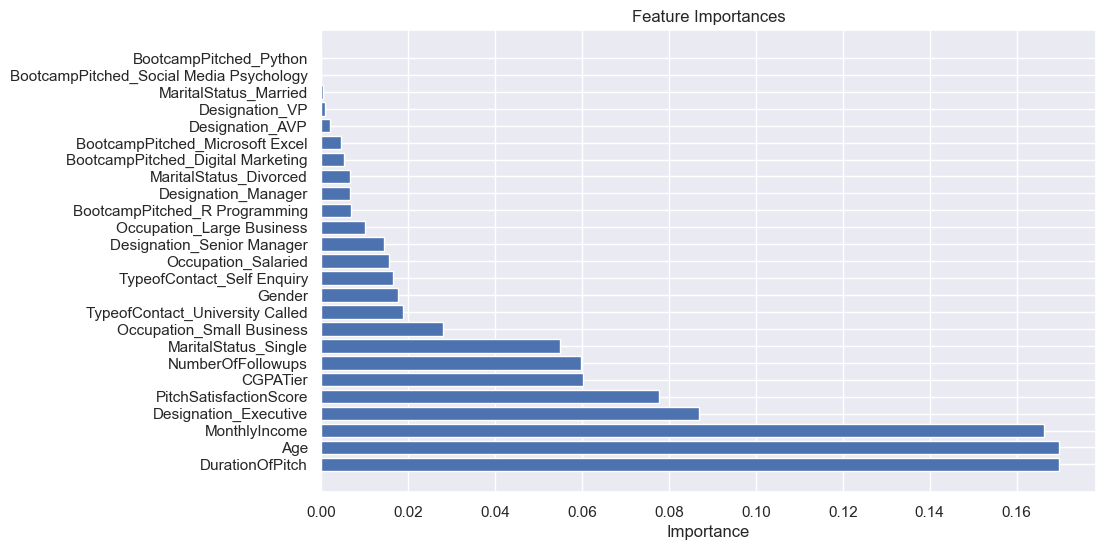

In [96]:
# Get feature importances
importances = dt_new.feature_importances_

# Create a DataFrame to view feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

It seems like the top three is: Duration of Pitch, Age, and Monthly Income

# Decision Tree with Bagging

In [111]:
from sklearn.ensemble import BaggingClassifier

# Define base learner as our optimal model from previous session
udt = DecisionTreeClassifier(random_state = 42, class_weight = 'balanced', max_depth = 200, 
                                     min_samples_leaf = 3, min_samples_split = 7, max_features = 15)

# Define the bagging classifier
bag = BaggingClassifier(estimator=udt, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 20, 50, 100, 150, 200, 250, 300],         
    'max_samples': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200],     
    'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

# Set up GridSearchCV
optimal_params_tree_bagging = GridSearchCV(
    BaggingClassifier(), 
    param_grid, 
    cv = 5,
    scoring = 'f1_weighted',
    verbose = 0
    )

# Fit GridSearchCV
optimal_params_tree_bagging.fit(X_train, y_train) 

best_param = optimal_params_tree_bagging.best_params_

# Best parameter and score from grid search
print(best_param)
print(optimal_params_tree.best_score_)

{'max_features': 9, 'max_samples': 200, 'n_estimators': 10}
0.8687498752924991


## Remodel

In [116]:
# Re-model using best_param, fit then look for F1 score
bag_remodel = BaggingClassifier(estimator=udt, random_state=42, 
                                max_features = 9, max_samples = 200, n_estimators = 10)

# Fit the bagging model
bag_remodel_fit = bag_remodel.fit(X_train, y_train)

# Predict the train and test dataset
y_train_pred_bag_remodel = bag_remodel_fit.predict(X_train)
y_test_pred_bag_remodel = bag_remodel_fit.predict(X_test)

# F1 scores
bag_remodel_train = f1_score(y_train, y_train_pred_bag_remodel, average='weighted')
bag_remodel_test = f1_score(y_test, y_test_pred_bag_remodel, average='weighted')

# Print accuracy
print('F1 score for train/test: %.4f/%.4f'
     % (bag_remodel_train, bag_remodel_test))

F1 score for train/test: 0.7967/0.7794


## Confusion Matrix

[[733  60]
 [135  49]]


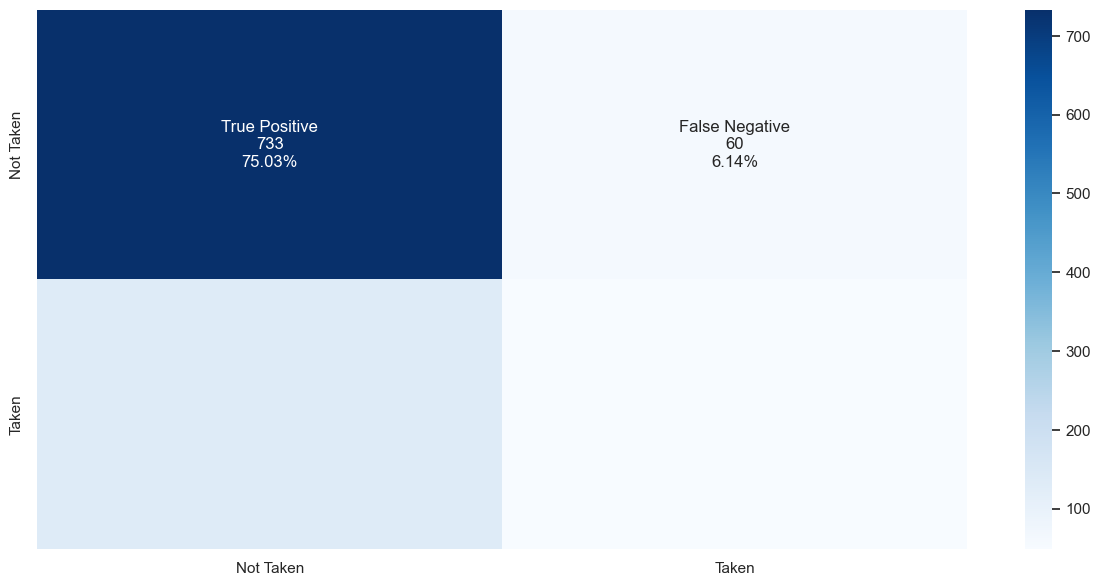

In [117]:
# Build confusion matrix based on remodelled Decision Trees with Bagging
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_bag_remodel).ravel()
print(confusion_matrix(y_test, y_test_pred_bag_remodel))

# Make confusion matrix
cm = confusion_matrix(y_test, y_test_pred_bag_remodel)
group_names = ['Not Taken', 'Taken']

# Plot confusion matrix
make_confusion_matrix(cm, group_names = label, categories = cat, cmap = 'Blues')

In [118]:
# Make classification report
cr = classification_report(y_test, y_test_pred_bag_remodel)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       793
           1       0.45      0.27      0.33       184

    accuracy                           0.80       977
   macro avg       0.65      0.60      0.61       977
weighted avg       0.77      0.80      0.78       977



# Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [5, 10, 15],
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
optimal_params_tree_rf = GridSearchCV(
    estimator = rf_model, 
    param_grid = param_grid,  
    cv = 5, 
    scoring = 'f1_weighted'
)

# Fit GridSearchCV
optimal_params_tree_rf.fit(X_train, y_train) 

best_param = optimal_params_tree_rf.best_params_

# Best parameter and score from grid search
print(best_param)
print(optimal_params_tree.best_score_)

{'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 200}
0.8687498752924991


## Model

In [119]:
# Remodel Random Forest based on best_param
RF = RandomForestClassifier(max_depth = 20, min_samples_leaf = 5, 
                           min_samples_split = 5, 
                           n_estimators = 200, random_state = 42)
# Fit the model
RF = RF.fit(X_train, y_train)

# Predict using the model
y_train_pred_rf = RF.predict(X_train)
y_test_pred_rf = RF.predict(X_test)

# F1 scores
rf_train = f1_score(y_train, y_train_pred_rf, average='weighted')
rf_test = f1_score(y_test, y_test_pred_rf, average='weighted')

# Print F1 score
print('F1 score for train/test: %.4f/%.4f'
     % (rf_train, rf_test))

F1 score for train/test: 0.8646/0.7994


## Confusion Matrix

[[763  30]
 [137  47]]


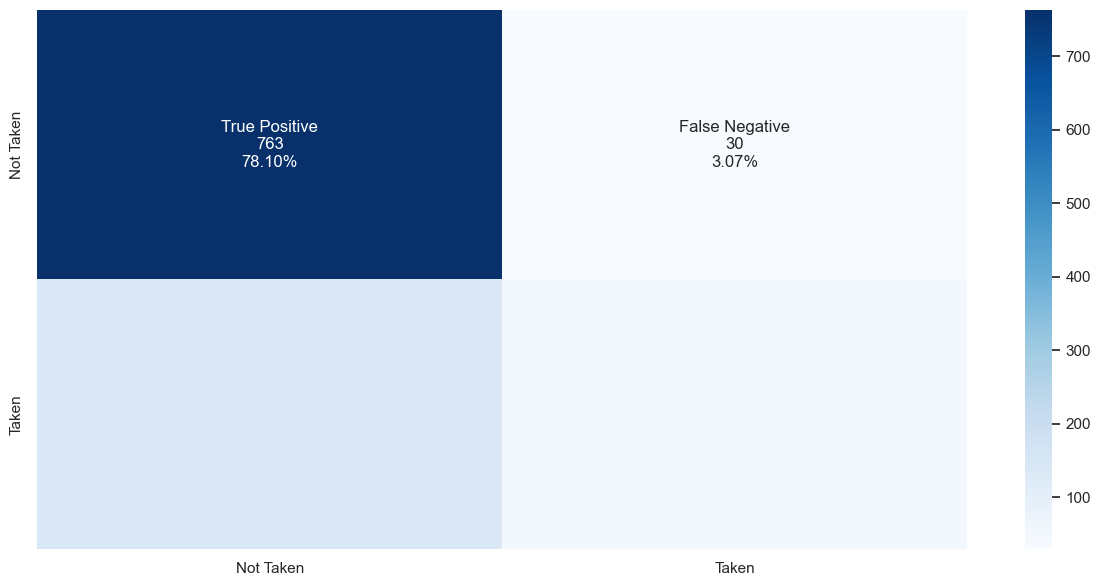

In [120]:
# Build confusion matrix based on remodelled Random Forest
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_rf).ravel()
print(confusion_matrix(y_test, y_test_pred_rf))

# Make confusion matrix
cm = confusion_matrix(y_test, y_test_pred_rf)
group_names = ['Not Taken', 'Taken']

# Plot confusion matrix
make_confusion_matrix(cm, group_names = label, categories = cat, cmap = 'Blues')

In [121]:
# Make classification report
cr = classification_report(y_test, y_test_pred_rf)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       793
           1       0.61      0.26      0.36       184

    accuracy                           0.83       977
   macro avg       0.73      0.61      0.63       977
weighted avg       0.80      0.83      0.80       977



# ROC curve for model comparison

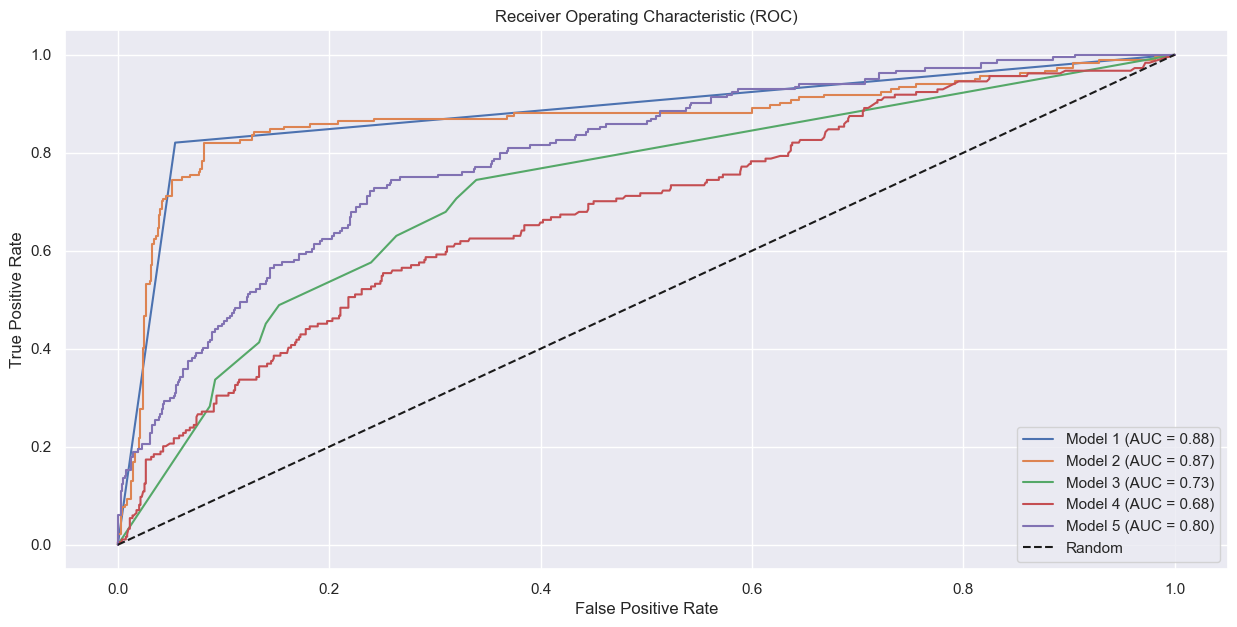

In [123]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Remodel SV2 to have probability = True so that we can plot SV2
svm3 = SVC(C = 100, class_weight = 'balanced', gamma = 1, kernel = 'rbf', probability=True)
svm3.fit(X_train, y_train)

models = [knn_model2, svm3, dt_new, bag_remodel, RF]

# Initialize plot
plt.figure()

# Iterate over models and plot ROC curve for each
for i, model in enumerate(models):
    # Predict probabilities
    y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    
    # Compute ROC curve and ROC AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'Model {i+1} (AUC = {roc_auc:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# Customize plot
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Show plot
plt.show()

# Model 1 = KNN
# Model 2 = SVM
# Model 3 = Decision Trees
# Model 4 = Decision Trees with Bagging
# Model 5 = Random Forests